## Transfer Functional Annotation to Orthogroups

* Open up excelsior functional annotation, read, extract (name, functions)
    * Separate lines of evidence?  What level of summarization do I want?
* Transfer functional summary to Gene family
    * Each gene family has "parent" excelsior genes. 
    * It may also have present _excelsior_ members, which is stronger evidence than "parent" attributes.
* What percentage of gene families did not get Functional Annotation?
* What percentage were low confidence inferrences?

In [1]:
import csv
functional_file = r"data\gff_files_for_diploid_taxa\Fraxinus_excelsior_38873_TGAC_v2.gff3.functional_annotation.tsv"
all_gene_info = {}
genes_annotated = {}
interpro_annotated = {}
with open(functional_file, newline='' ) as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t')
    for nLines, row in enumerate(reader):
        all_gene_info[row['#ID']] = row
        genes_annotated[row['#ID']] = row['Blast2GO_GO_Description']
        interpro_annotated[row['#ID']] = row['Interproscan_IPR_Description']
        if nLines < 6:
            print(row['#ID'], row)
genes_annotated['FRAEX38873_v2_000077090.1']

FRAEX38873_v2_000000010.1 {'Interproscan_IPR_Description': 'SPla/RYanodine receptor SPRY|CTLH/CRA C-terminal to LisH motif domain|Concanavalin A-like lectin/glucanases superfamily|SPla/RYanodine receptor subgroup|CTLH, C-terminal LisH motif|CRA domain|B30.2/SPRY domain', '#ID': 'FRAEX38873_v2_000000010.1', 'Blast2GO_GO_Description': 'NULL', 'Blast2GO_GO_term': 'NULL', 'Interproscan_GO_term': 'GO:0005515', 'Blast2GO_EC_Number': 'NULL', 'Interproscan_IPR': 'IPR003877|IPR024964|IPR008985|IPR018355|IPR006595|IPR013144|IPR001870', 'Interproscan_EC_Number': 'NULL', 'Interproscan_Pathways': 'NULL'}
FRAEX38873_v2_000000010.2 {'Interproscan_IPR_Description': 'SPla/RYanodine receptor SPRY|CTLH/CRA C-terminal to LisH motif domain|Concanavalin A-like lectin/glucanases superfamily|SPla/RYanodine receptor subgroup|CTLH, C-terminal LisH motif|CRA domain|B30.2/SPRY domain', '#ID': 'FRAEX38873_v2_000000010.2', 'Blast2GO_GO_Description': 'NULL', 'Blast2GO_GO_term': 'NULL', 'Interproscan_GO_term': 'GO:00

'heat shock protein 70'

Filtered exemplars orthogroups

## Read Orthogroups

In [2]:
ortho_file = r"Ash_Proteome\Results_Jun25\Orthogroups.csv"
orthogroups = {}
OG_order = []
with open(ortho_file, newline='' ) as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for nLines, row in enumerate(reader):
        og = row[0].replace(':','')
        orthogroups[og] = {'genes': list(row[1:])}
        OG_order.append(og)
orthogroups['OG0000045']

{'genes': ['FRAEX38873_v2_000077090.1',
  'FRAEX38873_v2_000115210.1',
  'FRAEX38873_v2_000148070.2',
  'FRAEX38873_v2_000197560.1',
  'FRAEX38873_v2_000284530.1',
  'FRAEX38873_v2_000287530.1',
  'FRAEX38873_v2_000300220.1',
  'FRAEX38873_v2_000301820.4',
  'FRAX01_000077090.1_R0',
  'FRAX01_000115210.1_R0',
  'FRAX01_000197560.1_R0',
  'FRAX01_000284530.1_R0',
  'FRAX01_000284530.1_R2',
  'FRAX01_000284530.1_R9',
  'FRAX01_000287530.1_R0',
  'FRAX01_000300220.1_R0',
  'FRAX01_000300220.1_R1',
  'FRAX02_000115210.1_R0',
  'FRAX02_000148070.1_R0',
  'FRAX02_000197560.1_R0',
  'FRAX02_000284530.1_R0',
  'FRAX02_000284530.1_R1',
  'FRAX02_000284530.1_R6',
  'FRAX02_000300220.1_R0',
  'FRAX02_000301820.2_R7',
  'FRAX03_000077090.1_R0',
  'FRAX03_000115210.1_R0',
  'FRAX03_000197560.1_R4',
  'FRAX03_000284530.1_R0',
  'FRAX03_000284530.1_R1',
  'FRAX03_000284530.1_R8',
  'FRAX03_000284530.1_R9',
  'FRAX03_000287530.1_R0',
  'FRAX03_000300220.1_R0',
  'FRAX04_000115210.1_R0',
  'FRAX04_0001

In [114]:
# Show that all genes occur only once, never in two orthogroups
genes_seen = set()
for group in orthogroups.values():
    assert all([g not in genes_seen for g in group['genes']]), group
    genes_seen.update(group['genes'])
total_count = len(genes_seen)
total_count

1153334

In [115]:
len(gene2family)

952865

# Aggregate Functional Information per OG by Excelsior Genes

In [4]:
len(all_gene_info)

50841

### Strong Support: _excelsior_ ortho-genes are present in the group

In [67]:
no_excelsior_found_groups = {}
functional_orthogroups = {}
columns = all_gene_info['FRAEX38873_v2_000077090.1'].keys()
for group in orthogroups:
    genes = orthogroups[group]['genes']
    candidates = [gene for gene in genes if gene.startswith('FRAEX') and (genes_annotated[gene] != 'NULL' or interpro_annotated[gene] != 'NULL')]
    functions = set()
    merged_row = {'genes': set(genes)}
    if candidates:
        for key in columns: # append additional candidates separate by commas
            merged_row[key] = ','.join(set([all_gene_info[gene][key] for gene in candidates]))
        functional_orthogroups[group] = merged_row
    else:
        merged_row.update({key:'' for key in columns})  # so that both datasets have the same labels
        no_excelsior_found_groups[group] = merged_row

print(functional_orthogroups['OG0000045']['Blast2GO_GO_Description'])        
print(functional_orthogroups['OG0000045']['genes'], '...')
print('\n', functional_orthogroups['OG0000045'])

heat shock,heat shock protein 70,protein
{'FRAX01_000300220.1_R1', 'FRAX12_000301820.3_R9', 'FRAX07_000300220.1_R0', 'FRAX13_000284530.1_R8', 'FRAX08_000197560.1_R0', 'FRAX12_000284530.1_R5', 'FRAX28_000115210.1_R0', 'FRAX29_000115210.1_R0', 'FRAX08_000144790.1_R0', 'FRAX12_000287530.1_R4', 'FRAEX38873_v2_000284530.1', 'FRAX28_000144790.1_R0', 'FRAX23_000300220.1_R1', 'FRAX32_000284530.1_R8', 'FRAX29_000284530.1_R2', 'FRAX02_000284530.1_R6', 'Solyc11g066060.1.1', 'FRAX04_000300220.1_R0', 'FRAX28_000300220.1_R0', 'FRAX23_000284530.1_R0', 'FRAX31_000287530.1_R0', 'FRAX32_000115210.1_R0', 'FRAX32_000300220.1_R0', 'FRAX04_000197560.1_R0', 'FRAX15_000284530.1_R0', 'Migut.J00342.1.p', 'Migut.F00790.1.p', 'FRAEX38873_v2_000077090.1', 'FRAX21_000300220.1_R0', 'FRAX30_000284530.1_R1', 'FRAX02_000284530.1_R0', 'FRAX08_000287530.1_R3', 'FRAX05_000287530.1_R0', 'FRAX19_000287530.1_R0', 'FRAX28_000148070.1_R0', 'FRAX29_000284530.1_R1', 'FRAX20_000284530.1_R0', 'FRAX07_000287530.1_R0', 'FRAX28_00028

In [68]:
from DNASkittleUtils.DDVUtils import pp

perc = pp(1 - (len(no_excelsior_found_groups) / len(orthogroups) ) )
print(perc, "of orthogroups have functional annotations")

30.075793% of orthogroups have functional annotations


but large groups with many genes are more likely to have annotations, which is good!

In [69]:
s = sum([len(group['genes']) for group in functional_orthogroups.values()])
print('Genes with annotations {:,} = '.format( s), pp(s / total_count))

Genes with annotations 952,865 =  82.618305%


In [70]:
for i, group_name in enumerate(functional_orthogroups):
    if i > 60:
        print(group_name, functional_orthogroups[group_name]['Blast2GO_GO_Description'])
    if i > 200:
        break

OG0016201 NULL
OG0003773 homeobox-leucine zipper protein hat14-like
OG0007174 tyrosine aminotransferase
OG0003841 NULL,uncharacterized hydrolase yutf-like
OG0017310 rna-binding protein containing kh domain protein
OG0021946 uncharacterized protein
OG0012924 rna recognition motif-containing protein
OG0003263 high-affinity nitrate transporter
OG0016874 beta-galactosidase-like
OG0007615 protein kinase
OG0007504 NULL
OG0021125 NULL
OG0003798 probable calcium-binding protein cml15-like
OG0009651 NULL
OG0018399 NULL
OG0001611 myb transcription factor,protein
OG0012213 NULL
OG0014403 membrane-associated progesterone binding protein 4
OG0007347 carbonic anhydrase
OG0005165 NULL,basic leucine-zipper 6
OG0000568 NULL
OG0016383 NULL
OG0016646 NULL
OG0012419 pentatricopeptide repeat-containing protein at5g66520-like
OG0004787 NULL
OG0008466 ribosomal protein l16,ribosomal protein s3
OG0005429 trehalose-phosphate phosphatase-like,trehalose-6-phosphate phosphatase
OG0006984 pentatricopeptide repeat-

Annotations that are present look informative and reasonably well merged

### Weak Support: _excelsior_ genes used as GeMoMa parent

Read the GeMoMa GFF file to locate the parent excelsior gene, then track that back to the orthogroup and spread it.  
This is roughly analogous to functional annotation for gene super families, where super families are constructed using annotation overlap networks.  
At the moment, 65% coverage of genes is probably good enough.

### No Support: no inferred functional annotation to work with

# Output Results as a new CSV
Three mega-columns: Name of OG Orthogroup, List of Functional Annotations, List of Genes

In [10]:
columns
#ID	Blast2GO_GO_term	Blast2GO_EC_Number	Blast2GO_GO_Description	Interproscan_IPR	Interproscan_IPR_Description	Interproscan_GO_term	Interproscan_EC_Number	Interproscan_Pathways
column_order = 'Blast2GO_GO_term', 'Blast2GO_EC_Number', 'Blast2GO_GO_Description',  'Interproscan_IPR',  'Interproscan_IPR_Description',  'Interproscan_GO_term', 'Interproscan_EC_Number', 'Interproscan_Pathways', 'genes'

#IMPORTANT: Make sure this file name matches your orthogroup source!
with open('data/functional_orthogroups_from_Jun25.csv', 'w') as outfile:
    outfile.write('Orthogroup Name\tReference Genes\t%s\n' % ('\t'.join(column_order)))
    for name in OG_order:
        if name in functional_orthogroups:
            outfile.write(name + '\t' + functional_orthogroups[name]['#ID'] + '\t')
            outfile.write('\t'.join([functional_orthogroups[name][key] for key in column_order]) + '\n')


# Classify families that have grown, shrunk or been stable

In [12]:
"OG0016622"
def cafe_to_OG(cafe_id):
    return "OG" + '%07d' % (cafe_id)
assert cafe_to_OG(16622) =="OG0016622"

In [12]:
from statistics import mean
grown = {}
shrunk = {}
stasis_families = {}
unremarkable_families = {}
with open(r"CAFE-4.2\data\exemplars\reports\exemplar_reestimate_summary_anc.txt", newline='' ) as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t')
    for nLines, row in enumerate(reader):
        if int(row['<5>']) > 0:  # must be root fraxinus
            frax = mean(int(i) for i in (row['FRAX06<4>'], row['FRAX00<2>'], row['FRAX09<10>'], row['FRAX11<8>'], row['FRAX07<0>'], row['FRAX19<6>']))
            oleaceae = int(row['<11>'])
            diff = (frax - oleaceae) / oleaceae
            family = cafe_to_OG(int(row['Family ID']))
            if diff >= .2:
                grown[family] = row
            elif diff <= -.2:
                shrunk[family] = row
            elif abs(diff) == 0:
                stasis_families[family] = row
            else:
                unremarkable_families[family] = row
len(grown), len(shrunk), len(stasis_families), len(unremarkable_families)

(723, 7499, 8428, 7670)

In [13]:
list(grown.keys())[:10]

['OG0010856',
 'OG0011752',
 'OG0012094',
 'OG0016909',
 'OG0009341',
 'OG0010171',
 'OG0011614',
 'OG0011089',
 'OG0012980',
 'OG0008698']

In [14]:
functional_orthogroups['OG0005269']

{'#ID': 'FRAEX38873_v2_000037610.3,FRAEX38873_v2_000306360.1,FRAEX38873_v2_000342560.1',
 'Blast2GO_EC_Number': 'NULL',
 'Blast2GO_GO_Description': 'agenet and bromo-adjacent homology domain-containing protein,NULL',
 'Blast2GO_GO_term': 'NULL,GO:0005488',
 'Interproscan_EC_Number': 'NULL',
 'Interproscan_GO_term': 'GO:0003677,NULL',
 'Interproscan_IPR': 'IPR001025|IPR008395|IPR014002,IPR014002',
 'Interproscan_IPR_Description': 'Tudor-like, plant,Bromo adjacent homology (BAH) domain|Agenet-like domain|Tudor-like, plant',
 'Interproscan_Pathways': 'NULL',
 'genes': 'FRAEX38873_v2_000037610.3,FRAEX38873_v2_000295240.1,FRAEX38873_v2_000306360.1,FRAEX38873_v2_000342560.1,FRAX01_000037610.3_R0,FRAX01_000342560.1_R0,FRAX02_000037610.3_R0,FRAX02_000342560.1_R0,FRAX03_000037610.3_R0,FRAX03_000037610.3_R1,FRAX04_000037610.3_R0,FRAX04_000037610.3_R1,FRAX05_000037610.3_R0,FRAX05_000342560.1_R0,FRAX06_000342560.1_R0,FRAX06_000342560.1_R1,FRAX07_000342560.1_R0,FRAX07_000342560.1_R1,FRAX08_00034256

In [15]:
changed_families = set(grown.keys()).union(shrunk.keys())
with_functions = [family for family in changed_families if family in functional_orthogroups]
print(pp(len(with_functions) / len(changed_families)), "of interesting families have functional annotations")

53.600097% of interesting families have functional annotations


In [16]:
GOs_that_have_grown = []
for family in grown:
    if family in functional_orthogroups:
        groups = [f for f in functional_orthogroups[family]['Blast2GO_GO_term'].split(',') if f != 'NULL']
        fns = [a for g in groups for a in g.split('|')]
        GOs_that_have_grown.extend(fns)
len(GOs_that_have_grown)

1887

### Trying goenrich with real data
values = {'GO: term': {set of gene ids}}  
query = [list of gene ids int()]

gene2go = goenrich.read.gene2go('GOenrich_db/gene2go.gz', tax_id=33090)  # 33090 = virdiplantae
gene2go_values = {k: set(v) for k,v in gene2go.groupby('GO_ID')['GeneID']}

##### TODO: Try using gene2go virdiplantae as background

In [210]:
from collections import defaultdict
import goenrich
import os
def output_set_enrichment(query_families, functional_orthogroups, output_name, GOslim=False):
    query_genes = list(query_families)
    #for family in query_families:
    #    if family in functional_orthogroups:
    #        new_genes = [f for f in functional_orthogroups[family]['genes']]
    #        query_genes.extend(new_genes)
    print("Received", len(query_families), "families with", len(query_genes), "genes.")
    
    values_background_GO = defaultdict(lambda: set())
    for family, row in functional_orthogroups.items():
        groups = [f for f in row['Blast2GO_GO_term'].split(',') if f != 'NULL']
        terms = [a for g in groups for a in g.split('|')]
        for term in terms:
            values_background_GO[term].add(family)
            
    print("Building GO tree")
    O = goenrich.obo.ontology('GOenrich_db/' + ('goslim_plant.obo' if GOslim else 'go-basic.obo'))
    goenrich.enrich.propagate(O, values_background_GO, 'Ash Background')
    print("Analyzing enrichment of", len(query_genes), "genes.")
    enriched_df = goenrich.enrich.analyze(O, query_genes, 'Ash Background') # , gvfile='example.dot')
    enriched_df = enriched_df.sort_values(by=['q', 'p'])
    enriched_df = enriched_df[enriched_df['p'] != 1].dropna()  # filter out GO terms with no hits
    enriched_df.to_html(output_name + '.html')
    print("Output", os.path.join(os.getcwd(), output_name + (' - plant' if GOslim else '') +'.html'))
    return enriched_df

### Fraxinus Exemplars super stable 2-copy families

In [207]:
# Found significant enrichment of developmental genes and metnion of sequence specific DNA binding
stable2_exemplar_fam = [cafe_to_OG(i) for i in [2163,2898,3012,3023,3051,3241,3254,3288,3302,3356,3378,3392,3424,3457,3541,3549,3554,3584,3617,3618,3619,3629,3656,3669,3685,3691,3694,3705,3712,3723,3728,3775,3782,3787,3803,3812,3813,3820,3822,3852,3862,3876,3877,3883,3886,3904,3912,3916,3918,3938,3941,3946,3947,3985,3994,4000,4007,4010,4021,4029,4030,4044,4056,4057,4070,4092,4093,4105,4106,4111,4115,4116,4125,4126,4141,4143,4152,4154,4156,4157,4161,4165,4171,4176,4177,4182,4187,4218,4221,4224,4225,4244,4253,4269,4282,4289,4299,4303,4309,4313,4329,4333,4337,4345,4346,4353,4356,4357,4362,4382,4384,4392,4400,4402,4405,4406,4407,4411,4412,4415,4418,4423,4424,4425,4427,4431,4435,4438,4443,4446,4448,4454,4466,4467,4471,4472,4485,4496,4499,4500,4501,4502,4504,4507,4510,4512,4519,4521,4523,4526,4531,4532,4534,4542,4544,4545,4547,4549,4562,4567,4570,4574,4576,4577,4580,4588,4590,4594,4596,4597,4598,4603,4605,4607,4608,4614,4621,4623,4626,4631,4648,4651,4653,4654,4655,4658,4659,4664,4668,4669,4670,4672,4674,4675,4676,4679,4682,4684,4688,4689,4691,4693,4695,4699,4701,4703,4705,4706,4716,4724,4725,4727,4728,4730,4735,4737,4744,4748,4750,4767,4770,4771,4773,4775,4776,4781,4783,4795,4798,4800,4802,4806,4807,4813,4815,4822,4828,4839,4844,4848,4850,4853,4866,4867,4870,4871,4872,4873,4875,4879,4880,4886,4888,4890,4896,4899,4902,4906,4921,4922,4925,4931,4933,4936,4942,4943,4945,4946,4947,4955,4958,4962,4963,4969,4973,4974,4979,4981,4982,4984,4992,4993,4994,4996,4998,4999,5007,5009,5013,5016,5025,5031,5033,5034,5039,5040,5045,5050,5052,5055,5057,5058,5060,5061,5062,5066,5069,5072,5077,5078,5081,5082,5084,5095,5096,5097,5100,5102,5103,5106,5109,5110,5111,5113,5117,5121,5134,5135,5142,5146,5148,5154,5160,5162,5165,5169,5170,5171,5177,5182,5187,5195,5203,5207,5212,5213,5218,5219,5223,5227,5228,5231,5232,5235,5238,5241,5244,5245,5249,5254,5263,5272,5274,5275,5281,5288,5289,5291,5292,5300,5301,5305,5309,5311,5312,5313,5330,5331,5332,5336,5340,5344,5352,5355,5359,5363,5372,5374,5377,5384,5391,5394,5396,5398,5402,5408,5409,5416,5418,5425,5427,5428,5438,5439,5440,5444,5446,5457,5459,5460,5461,5470,5475,5476,5477,5479,5480,5482,5485,5486,5489,5491,5494,5500,5503,5506,5509,5510,5511,5514,5516,5521,5533,5539,5540,5551,5553,5554,5558,5560,5568,5569,5571,5574,5576,5577,5580,5585,5588,5590,5605,5614,5616,5637,5639,5642,5643,5645,5646,5648,5650,5651,5652,5659,5663,5668,5669,5671,5672,5675,5676,5679,5681,5683,5685,5687,5688,5693,5696,5697,5698,5703,5707,5709,5710,5711,5716,5718,5721,5725,5730,5731,5732,5737,5739,5740,5753,5755,5758,5761,5764,5768,5778,5785,5788,5789,5790,5795,5801,5804,5807,5808,5812,5813,5815,5816,5817,5820,5821,5824,5834,5835,5836,5846,5847,5849,5853,5855,5858,5859,5860,5864,5866,5869,5873,5881,5886,5887,5888,5899,5902,5911,5912,5915,5916,5918,5920,5921,5922,5923,5924,5925,5930,5935,5940,5942,5947,5955,5959,5960,5961,5963,5965,5968,5985,5988,5989,5990,5991,5992,5993,5994,6008,6009,6010,6013,6018,6020,6021,6032,6033,6036,6039,6041,6043,6044,6046,6049,6053,6055,6057,6070,6071,6076,6079,6080,6082,6084,6085,6087,6090,6091,6095,6098,6099,6101,6102,6109,6114,6115,6119,6122,6123,6124,6137,6138,6139,6142,6145,6147,6152,6155,6157,6159,6161,6163,6167,6174,6176,6178,6180,6185,6188,6191,6197,6205,6215,6217,6222,6226,6230,6232,6235,6236,6241,6244,6245,6248,6253,6254,6259,6265,6266,6267,6271,6273,6279,6280,6282,6283,6286,6290,6300,6305,6306,6307,6314,6315,6317,6319,6322,6329,6331,6332,6336,6337,6338,6341,6342,6344,6346,6347,6352,6365,6371,6373,6374,6377,6393,6409,6413,6423,6429,6433,6438,6442,6452,6461,6462,6463,6468,6470,6481,6482,6486,6487,6491,6496,6497,6503,6510,6513,6519,6520,6524,6528,6530,6537,6544,6548,6550,6553,6555,6558,6564,6568,6569,6570,6581,6584,6589,6601,6602,6605,6606,6609,6612,6626,6627,6628,6630,6633,6635,6636,6638,6639,6641,6642,6643,6648,6660,6661,6664,6672,6673,6674,6675,6678,6681,6685,6687,6690,6694,6699,6701,6704,6707,6713,6714,6722,6730,6734,6736,6739,6749,6752,6755,6756,6758,6760,6771,6775,6778,6780,6782,6783,6784,6789,6790,6791,6800,6802,6808,6814,6815,6833,6852,6864,6866,6867,6869,6872,6882,6883,6885,6887,6888,6891,6892,6898,6902,6903,6906,6907,6909,6916,6917,6921,6924,6926,6927,6935,6936,6939,6944,6948,6950,6952,6956,6957,6960,6963,6967,6976,6977,6978,6979,6981,6991,6997,7008,7011,7015,7022,7023,7033,7035,7043,7046,7062,7069,7077,7083,7087,7091,7092,7093,7096,7098,7108,7110,7115,7123,7133,7134,7138,7144,7152,7153,7169,7171,7172,7184,7185,7201,7204,7212,7213,7215,7218,7220,7223,7227,7231,7250,7251,7258,7259,7261,7264,7270,7272,7290,7291,7300,7301,7306,7309,7310,7318,7320,7322,7324,7330,7331,7334,7341,7345,7354,7355,7359,7368,7379,7380,7383,7387,7388,7390,7393,7394,7397,7399,7403,7409,7410,7413,7418,7422,7446,7448,7452,7454,7457,7461,7470,7471,7475,7476,7479,7480,7488,7489,7493,7494,7496,7499,7504,7506,7507,7511,7512,7513,7537,7538,7545,7548,7549,7552,7568,7572,7577,7578,7579,7586,7588,7594,7596,7602,7612,7613,7614,7623,7629,7633,7641,7643,7667,7670,7673,7681,7688,7702,7708,7709,7716,7723,7726,7736,7742,7750,7754,7756,7758,7761,7770,7780,7781,7782,7787,7796,7802,7805,7806,7807,7812,7813,7816,7849,7852,7854,7857,7859,7869,7870,7872,7873,7883,7891,7893,7904,7912,7917,7920,7922,7930,7931,7932,7936,7940,7942,7946,7948,7954,7956,7958,7966,7969,7973,7983,7987,7992,7996,8008,8011,8014,8016,8019,8021,8026,8027,8057,8064,8073,8079,8082,8085,8087,8089,8098,8110,8118,8127,8132,8140,8148,8162,8163,8165,8167,8170,8188,8189,8204,8209,8221,8223,8229,8231,8235,8236,8243,8245,8249,8250,8253,8280,8281,8282,8289,8292,8299,8324,8325,8329,8332,8337,8339,8340,8358,8368,8373,8374,8377,8391,8399,8402,8406,8410,8411,8414,8430,8439,8446,8456,8457,8461,8476,8478,8493,8497,8500,8504,8505,8514,8515,8519,8523,8542,8559,8561,8566,8567,8577,8594,8596,8600,8608,8616,8665,8681,8690,8692,8693,8694,8703,8704,8706,8723,8726,8727,8736,8741,8744,8762,8772,8778,8781,8783,8789,8799,8805,8815,8817,8819,8824,8829,8831,8838,8839,8841,8845,8848,8869,8870,8886,8887,8891,8893,8925,8931,8934,8936,8937,8952,8956,8991,8996,8997,8999,9005,9012,9019,9025,9038,9044,9047,9055,9058,9079,9087,9088,9090,9096,9103,9105,9111,9112,9122,9124,9125,9139,9142,9153,9164,9167,9170,9172,9182,9216,9235,9243,9248,9263,9268,9277,9279,9280,9283,9295,9298,9308,9322,9329,9342,9344,9350,9358,9369,9377,9379,9387,9393,9396,9406,9432,9433,9449,9453,9457,9466,9469,9475,9492,9496,9500,9508,9515,9518,9522,9535,9546,9559,9570,9582,9592,9638,9654,9657,9688,9727,9730,9748,9751,9769,9787,9790,9795,9816,9833,9834,9841,9862,9865,9880,9894,9905,9933,9941,9964,9973,9974,9985,9992,10108,10116,10118,10121,10143,10169,10175,10198,10215,10219,10220,10221,10223,10228,10257,10287,10303,10333,10365,10389,10412,10438,10440,10452,10469,10474,10488,10490,10496,10503,10521,10522,10539,10545,10569,10604,10652,10684,10728,10730,10738,10751,10759,10762,10808,10814,10847,10887,10970,11042,11267,11286,11369,11408,11477,11487,11726,11860,11869,11915,12030,12177,12751,12964,13205,13936,14157,14236,15037,15268,16966,17521,17929]]
stable2 = output_set_enrichment(stable2_exemplar_fam, functional_orthogroups, 'Fraxinus Exemplars super stable 2-copy families')

Received 1366 families with 1366 genes.
Building GO tree
Analyzing enrichment of 1366 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\Fraxinus Exemplars super stable 2-copy families - plant.html


In [208]:
# Nothing significant found
all_stable2_exemplar_fam = [cafe_to_OG(i) for i in [3254,3457,3694,3712,3813,3912,4007,4182,4221,4435,4448,4471,4547,4549,4574,4607,4750,4767,4783,4870,4921,4922,4973,4979,5077,5081,5100,5146,5212,5219,5553,5659,5679,5732,5740,5785,5807,5940,5965,5985,5990,6271,6344,6352,6365,6606,6755,6833,6872,6887,7015,7331,7422,7452,7513,7643,7688,7891,7969,8087,8337,8478,8514,8567,8704,8805,8936,9025,9167,9283,9379,9449,9453,9500,9546,9769,9833,10808,10847,11726,14157]]
all_stable2 = output_set_enrichment(all_stable2_exemplar_fam, functional_orthogroups, 'Exemplars run super stable 2-copy families in all taxa')

Received 81 families with 81 genes.
Building GO tree
Analyzing enrichment of 81 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\Exemplars run super stable 2-copy families in all taxa - plant.html


In [18]:
frax_stable_fam = [cafe_to_OG(i) for i in [3617,3985,4010,4056,4161,4165,4182,4282,4299,4303,4309,4333,4337,4345,4346,4356,4411,4415,4423,4431,4435,4438,4443,4446,4472,4499,4504,4526,4544,4545,4605,4608,4623,4654,4674,4676,4679,4682,4689,4727,4728,4737,4744,4771,4775,4795,4802,4806,4807,4866,4871,4880,4890,4902,4942,4947,4955,4963,4974,4992,5009,5013,5016,5025,5066,5069,5078,5082,5084,5097,5117,5274,5275,5311,5476,5477,5509,5590,5731,5959]]
frax_stable = output_set_enrichment(frax_stable_fam, functional_orthogroups, 'Stable 2-copy from WGD rates all Oleaceae')

Received 80 families with 80 genes.
Building GO tree
Analyzing enrichment of 80 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\Stable 2-copy from WGD rates all Oleaceae.html


In [209]:
frax_stable_fam = [cafe_to_OG(i) for i in [3617,3745,3748,3859,3872,3985,4010,4013,4056,4060,4074,4085,4090,4161,4165,4182,4183,4210,4243,4282,4288,4299,4303,4309,4324,4333,4337,4340,4345,4346,4356,4411,4415,4421,4423,4431,4435,4436,4438,4443,4446,4472,4499,4504,4505,4526,4544,4545,4575,4589,4592,4605,4608,4617,4623,4654,4661,4674,4676,4679,4682,4689,4690,4718,4727,4728,4737,4744,4754,4763,4771,4775,4792,4795,4802,4806,4807,4866,4871,4880,4890,4902,4942,4947,4955,4963,4974,4992,5009,5013,5016,5025,5027,5066,5069,5078,5082,5084,5097,5117,5178,5199,5236,5274,5275,5311,5318,5322,5326,5367,5423,5476,5477,5509,5534,5590,5727,5731,5745,5762,5959]]
frax_stable = output_set_enrichment(frax_stable_fam, functional_orthogroups, 'Stable 2-copy from WGD rates all Fraxinus')

Received 121 families with 121 genes.
Building GO tree
Analyzing enrichment of 121 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\Stable 2-copy from WGD rates all Fraxinus - plant.html


In [21]:
s1ef = [cafe_to_OG(i) for i in [9327,10132,10296,10493,10635,10791,10947,11024,11076,11170,11213,11333,11348,11395,11598,11615,11644,11688,11693,11720,11735,11736,11773,11799,11819,11829,11832,11852,11863,11867,11898,11937,11970,11973,12024,12034,12087,12089,12165,12195,12211,12216,12267,12291,12326,12342,12348,12362,12366,12368,12373,12388,12399,12409,12422,12449,12459,12463,12473,12474,12493,12532,12535,12536,12571,12589,12597,12616,12655,12659,12662,12673,12675,12687,12691,12693,12708,12720,12721,12727,12736,12740,12752,12754,12759,12763,12778,12788,12800,12807,12808,12821,12823,12831,12839,12844,12849,12854,12857,12864,12870,12871,12879,12882,12895,12901,12904,12912,12931,12944,12945,12952,12955,12981,12983,12984,12987,12988,12992,12993,12999,13000,13009,13013,13016,13019,13020,13022,13044,13048,13054,13059,13068,13075,13085,13092,13096,13104,13125,13133,13138,13142,13143,13144,13145,13149,13150,13151,13156,13157,13163,13165,13166,13167,13169,13170,13174,13179,13182,13183,13185,13186,13188,13189,13192,13196,13197,13201,13206,13209,13210,13212,13214,13215,13220,13223,13229,13230,13232,13233,13234,13235,13239,13243,13247,13248,13249,13252,13260,13262,13264,13268,13270,13274,13277,13279,13281,13286,13287,13288,13289,13290,13292,13296,13299,13300,13301,13306,13307,13308,13310,13311,13316,13318,13321,13323,13324,13328,13329,13330,13333,13336,13339,13340,13342,13344,13345,13347,13354,13356,13358,13361,13362,13370,13377,13381,13382,13384,13385,13386,13387,13395,13397,13398,13402,13403,13404,13408,13409,13410,13417,13418,13420,13425,13427,13432,13434,13436,13439,13440,13442,13443,13445,13448,13450,13452,13458,13459,13460,13461,13462,13469,13470,13472,13474,13475,13476,13478,13482,13483,13485,13489,13492,13493,13494,13496,13497,13500,13503,13507,13511,13512,13516,13518,13519,13520,13524,13528,13530,13531,13533,13534,13537,13539,13541,13542,13543,13550,13551,13553,13555,13557,13558,13560,13561,13567,13569,13570,13574,13579,13580,13581,13582,13583,13586,13587,13588,13593,13597,13599,13600,13602,13603,13605,13607,13608,13609,13610,13611,13614,13619,13622,13629,13632,13634,13635,13637,13638,13640,13641,13642,13645,13650,13652,13658,13660,13661,13666,13669,13672,13673,13677,13678,13679,13682,13683,13685,13689,13697,13701,13702,13706,13712,13714,13715,13716,13717,13720,13722,13724,13725,13732,13736,13739,13740,13741,13746,13747,13748,13749,13751,13755,13758,13762,13763,13764,13766,13768,13775,13776,13778,13781,13785,13787,13791,13796,13800,13803,13806,13812,13813,13814,13815,13821,13822,13824,13826,13827,13830,13833,13839,13842,13845,13846,13847,13848,13849,13850,13851,13852,13854,13862,13868,13870,13871,13873,13875,13876,13878,13880,13881,13882,13884,13885,13887,13888,13890,13897,13898,13901,13904,13908,13909,13910,13911,13913,13915,13916,13918,13922,13923,13925,13927,13928,13934,13937,13939,13943,13944,13945,13946,13947,13948,13951,13952,13954,13955,13956,13960,13961,13963,13970,13971,13972,13974,13975,13977,13981,13985,13988,13992,13993,13994,14000,14001,14003,14006,14007,14008,14011,14012,14014,14015,14039,14042,14043,14055,14056,14061,14067,14074,14075,14079,14080,14082,14085,14088,14089,14090,14092,14093,14098,14103,14105,14107,14108,14114,14119,14123,14128,14129,14130,14136,14145,14149,14151,14154,14162,14165,14168,14169,14172,14175,14176,14182,14187,14190,14192,14193,14196,14201,14211,14212,14213,14215,14216,14224,14228,14235,14238,14243,14244,14249,14250,14253,14254,14255,14257,14258,14271,14275,14277,14278,14281,14283,14284,14285,14289,14292,14293,14297,14305,14307,14309,14311,14317,14319,14321,14323,14324,14327,14328,14339,14341,14342,14345,14353,14367,14368,14370,14374,14375,14390,14393,14400,14402,14410,14413,14416,14420,14422,14423,14428,14433,14435,14444,14447,14450,14456,14460,14461,14466,14467,14470,14481,14482,14485,14487,14490,14505,14506,14513,14514,14516,14518,14522,14532,14533,14539,14545,14547,14548,14551,14555,14556,14557,14559,14561,14563,14570,14573,14577,14580,14582,14585,14589,14590,14594,14598,14610,14611,14615,14630,14631,14636,14642,14644,14646,14647,14649,14654,14655,14659,14660,14661,14663,14664,14676,14682,14683,14686,14687,14692,14703,14707,14711,14714,14715,14721,14722,14730,14740,14742,14744,14745,14747,14749,14750,14753,14758,14761,14763,14764,14765,14766,14774,14778,14779,14780,14783,14791,14792,14793,14799,14800,14811,14814,14829,14832,14834,14835,14838,14845,14848,14851,14857,14862,14870,14873,14874,14877,14880,14892,14896,14905,14907,14913,14916,14917,14919,14921,14924,14926,14932,14952,14957,14963,14976,14978,14987,14997,14999,15004,15008,15014,15016,15018,15032,15039,15044,15046,15049,15057,15066,15069,15070,15076,15102,15104,15109,15110,15113,15120,15126,15127,15129,15137,15151,15154,15155,15163,15171,15178,15179,15181,15191,15193,15199,15202,15208,15212,15237,15242,15247,15257,15258,15264,15269,15273,15274,15275,15292,15299,15301,15310,15318,15328,15333,15343,15345,15347,15355,15359,15365,15374,15379,15386,15388,15389,15395,15406,15407,15410,15411,15428,15432,15436,15444,15446,15447,15448,15466,15467,15469,15470,15472,15473,15478,15486,15496,15498,15506,15507,15516,15518,15519,15528,15529,15546,15547,15550,15551,15552,15555,15559,15561,15564,15565,15582,15592,15596,15597,15602,15606,15616,15621,15623,15626,15632,15634,15643,15644,15647,15658,15661,15664,15667,15668,15670,15676,15678,15679,15683,15684,15690,15692,15710,15719,15720,15727,15733,15736,15738,15743,15744,15757,15758,15764,15765,15773,15774,15775,15776,15779,15789,15791,15795,15835,15838,15844,15849,15852,15854,15863,15867,15868,15876,15879,15881,15888,15905,15909,15915,15918,15922,15926,15946,15960,15962,15970,15986,15987,15989,15991,15997,15998,16000,16018,16028,16031,16046,16048,16060,16067,16078,16080,16082,16083,16095,16097,16098,16109,16113,16120,16122,16143,16147,16155,16159,16163,16165,16168,16175,16181,16182,16191,16208,16209,16217,16219,16220,16221,16224,16226,16238,16253,16255,16263,16269,16272,16280,16284,16292,16297,16299,16302,16307,16310,16317,16325,16330,16332,16336,16337,16343,16352,16357,16358,16367,16375,16388,16393,16394,16398,16403,16408,16415,16421,16426,16429,16431,16434,16450,16455,16461,16462,16463,16466,16473,16482,16488,16516,16523,16525,16531,16534,16537,16539,16542,16544,16545,16550,16556,16557,16560,16567,16570,16573,16576,16577,16580,16581,16585,16590,16598,16601,16607,16613,16615,16616,16620,16635,16642,16658,16665,16667,16669,16676,16683,16685,16695,16696,16697,16698,16699,16706,16708,16723,16728,16733,16736,16740,16745,16753,16760,16765,16777,16788,16792,16796,16799,16813,16822,16825,16826,16837,16840,16846,16868,16880,16888,16892,16914,16916,16928,16932,16939,16941,16953,16956,16964,16967,16968,16972,16973,16989,16992,17011,17015,17023,17029,17031,17043,17046,17049,17053,17055,17087,17109,17114,17134,17136,17153,17156,17158,17161,17170,17171,17178,17179,17183,17185,17189,17211,17213,17215,17217,17219,17221,17222,17223,17225,17227,17228,17231,17237,17248,17249,17254,17255,17256,17260,17261,17267,17272,17277,17281,17285,17296,17300,17302,17303,17307,17320,17331,17344,17346,17347,17360,17362,17363,17373,17374,17376,17380,17392,17393,17395,17400,17402,17438,17442,17444,17445,17456,17461,17475,17483,17484,17511,17529,17536,17538,17543,17548,17551,17559,17566,17567,17570,17571,17578,17584,17585,17587,17591,17607,17616,17622,17630,17633,17635,17640,17642,17650,17653,17655,17658,17662,17669,17673,17674,17675,17681,17686,17687,17689,17692,17694,17700,17706,17713,17718,17723,17729,17730,17737,17745,17765,17767,17777,17779,17787,17789,17791,17794,17795,17813,17853,17854,17857,17864,17875,17879,17883,17886,17887,17888,17889,17899,17903,17910,17915,17928,17947,17948,17951,17955,17958,17959,17979,17984,17985,17986,17992,18000,18001,18002,18007,18017,18021,18023,18026,18032,18036,18043,18048,18055,18057,18058,18059,18061,18063,18064,18082,18084,18088,18099,18103,18115,18121,18122,18127,18167,18168,18179,18188,18191,18192,18210,18212,18217,18224,18227,18228,18239,18249,18251,18254,18256,18258,18271,18272,18273,18285,18292,18293,18296,18300,18303,18309,18311,18320,18324,18335,18336,18337,18341,18361,18365,18370,18384,18393,18394,18396,18441,18454,18457,18466,18470,18477,18478,18494,18501,18502,18522,18538,18568,18570,18571,18575,18590,18592,18596,18609,18617,18621,18625,18629,18630,18632,18637,18646,18691,18720,18721,18727,18735,18742,18762,18764,18770,18775,18777,18778,18794,18809,18824,18845,18849,18864,18887,18888,18889,18895,18897,18903,18905,18928,18936,18953,18964,18965,18966,18968,18983,18993,19000,19005,19010,19024,19040,19043,19048,19086,19088,19094,19107,19110,19120,19140,19147,19149,19153,19157,19162,19173,19182,19187,19195,19208,19213,19214,19220,19221,19225,19231,19245,19279,19287,19289,19302,19307,19322,19327,19330,19331,19340,19343,19344,19356,19368,19381,19382,19390,19399,19403,19449,19458,19463,19464,19470,19502,19503,19504,19508,19512,19515,19516,19527,19540,19546,19552,19565,19608,19623,19629,19642,19651,19654,19662,19669,19674,19683,19688,19694,19697,19708,19712,19729,19737,19738,19802,19842,19856,19860,19903,19942,19991,20027,20037,20104,20122,20123,20161,20166,20180,20188,20193,20194,20195,20196,20198,20201,20202,20271,20291,20336,20351,20353,20452,20456,20478,20483,20492,20510,20512,20535,20616,20638,20674,20691,20813,20844,20854,21077,21278]]
s1e = output_set_enrichment(s1ef, functional_orthogroups, 'Stable 1 exemplars')

Received 1537 families with 1537 genes.
Building GO tree
Analyzing enrichment of 1537 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\Stable 1 exemplars.html


In [22]:
s1af = [cafe_to_OG(i) for i in [11025,11085,11278,11294,11357,11375,11518,11542,11651,11750,11795,11887,11897,11920,11926,11928,12026,12027,12047,12078,12125,12140,12150,12151,12158,12162,12189,12205,12206,12244,12257,12265,12295,12312,12319,12320,12386,12387,12395,12407,12414,12455,12471,12480,12483,12498,12506,12530,12532,12534,12536,12539,12540,12550,12551,12555,12560,12571,12586,12601,12605,12608,12609,12613,12616,12621,12624,12628,12634,12643,12655,12661,12666,12667,12669,12673,12675,12678,12683,12689,12691,12704,12706,12713,12724,12732,12737,12741,12748,12755,12757,12771,12774,12778,12783,12786,12788,12792,12800,12811,12822,12823,12824,12826,12831,12838,12839,12840,12851,12857,12864,12868,12871,12872,12873,12887,12895,12897,12904,12914,12918,12931,12946,12949,12952,12973,12978,12981,12982,12985,12987,12993,12996,12999,13006,13017,13022,13028,13029,13048,13052,13054,13058,13062,13064,13068,13070,13071,13075,13089,13091,13094,13097,13125,13131,13140,13142,13143,13144,13145,13149,13150,13151,13156,13157,13163,13165,13166,13169,13170,13174,13179,13182,13183,13185,13186,13188,13189,13196,13197,13206,13209,13210,13214,13215,13220,13230,13232,13233,13235,13239,13243,13247,13249,13254,13260,13262,13268,13270,13274,13277,13279,13280,13281,13284,13285,13286,13288,13289,13290,13291,13292,13296,13299,13300,13301,13306,13307,13308,13310,13316,13318,13321,13323,13324,13328,13330,13333,13336,13339,13340,13342,13347,13354,13356,13358,13361,13362,13377,13381,13384,13385,13386,13387,13395,13403,13408,13410,13417,13418,13420,13427,13429,13432,13434,13436,13439,13440,13442,13445,13448,13450,13452,13458,13460,13461,13462,13463,13465,13467,13469,13472,13474,13475,13476,13482,13483,13485,13489,13492,13493,13494,13496,13497,13500,13503,13511,13512,13516,13518,13519,13520,13524,13528,13529,13531,13532,13533,13534,13537,13539,13541,13542,13547,13550,13551,13553,13555,13557,13558,13560,13567,13569,13574,13575,13580,13581,13582,13583,13587,13588,13593,13594,13595,13597,13599,13600,13603,13607,13608,13609,13610,13611,13614,13619,13622,13628,13629,13631,13632,13634,13635,13637,13638,13640,13641,13642,13645,13650,13652,13658,13660,13661,13664,13665,13666,13669,13672,13673,13677,13678,13679,13683,13685,13689,13697,13699,13701,13702,13706,13712,13714,13715,13716,13717,13720,13722,13724,13725,13727,13732,13736,13739,13740,13746,13747,13748,13749,13751,13753,13755,13758,13762,13763,13766,13768,13773,13775,13776,13778,13781,13782,13784,13785,13787,13791,13800,13803,13805,13806,13812,13813,13814,13815,13822,13824,13826,13827,13830,13832,13833,13837,13839,13844,13845,13846,13847,13849,13850,13851,13852,13853,13854,13856,13862,13866,13868,13870,13871,13872,13873,13874,13875,13876,13878,13880,13881,13883,13884,13885,13887,13888,13889,13890,13897,13898,13901,13903,13904,13908,13909,13910,13913,13915,13916,13918,13920,13922,13923,13925,13927,13928,13934,13937,13939,13943,13944,13945,13946,13947,13948,13949,13951,13952,13954,13956,13960,13961,13963,13965,13971,13972,13975,13977,13978,13981,13985,13988,13992,13993,13994,13997,14000,14001,14003,14006,14008,14011,14012,14014,14015,14038,14043,14044,14047,14053,14054,14060,14067,14068,14075,14078,14083,14100,14104,14108,14109,14114,14115,14121,14126,14127,14137,14142,14143,14145,14148,14149,14160,14161,14164,14170,14171,14174,14176,14181,14184,14185,14190,14196,14201,14205,14208,14213,14218,14219,14220,14227,14228,14232,14233,14235,14237,14239,14244,14253,14255,14256,14262,14266,14268,14271,14274,14276,14283,14284,14305,14307,14312,14316,14317,14323,14328,14335,14342,14343,14348,14351,14354,14365,14366,14368,14371,14375,14376,14377,14378,14381,14387,14392,14397,14399,14401,14402,14412,14420,14424,14425,14429,14431,14432,14435,14441,14445,14454,14464,14466,14475,14479,14485,14488,14493,14494,14497,14501,14510,14511,14531,14534,14536,14537,14540,14542,14551,14557,14558,14562,14565,14572,14576,14577,14578,14581,14583,14586,14589,14590,14591,14592,14595,14596,14602,14608,14620,14628,14641,14645,14664,14669,14672,14673,14676,14677,14680,14684,14688,14694,14695,14698,14699,14700,14701,14703,14705,14716,14719,14721,14722,14731,14736,14739,14748,14750,14753,14754,14757,14760,14764,14765,14767,14769,14771,14775,14777,14781,14786,14795,14796,14799,14800,14802,14803,14805,14821,14823,14829,14830,14835,14841,14842,14843,14845,14850,14855,14858,14862,14863,14873,14875,14886,14893,14897,14899,14918,14920,14922,14927,14936,14950,14954,14971,14973,14982,14986,14993,14995,15005,15006,15007,15010,15011,15015,15029,15035,15040,15043,15047,15055,15056,15073,15077,15078,15082,15090,15091,15096,15100,15101,15107,15119,15125,15131,15135,15143,15150,15159,15168,15169,15173,15174,15180,15183,15184,15189,15196,15203,15214,15215,15221,15223,15224,15230,15232,15235,15236,15238,15245,15255,15265,15267,15277,15278,15279,15281,15284,15293,15294,15295,15296,15298,15304,15313,15321,15325,15329,15331,15335,15336,15337,15339,15340,15348,15363,15375,15376,15377,15396,15399,15409,15424,15431,15434,15437,15439,15440,15442,15443,15453,15462,15463,15465,15467,15468,15479,15487,15490,15495,15499,15502,15504,15508,15515,15523,15527,15537,15541,15542,15549,15553,15565,15566,15572,15578,15579,15585,15587,15588,15591,15593,15595,15598,15601,15604,15609,15610,15614,15617,15619,15622,15627,15628,15629,15633,15636,15639,15640,15642,15653,15655,15660,15662,15663,15665,15671,15674,15680,15681,15682,15686,15696,15706,15707,15715,15718,15722,15723,15724,15728,15732,15737,15748,15750,15753,15761,15777,15780,15783,15788,15789,15794,15796,15797,15826,15892,15895,15908,15920,15933,15941,15956,15976,16024,16032,16054,16066,16112,16124,16127,16139,16144,16174,16177,16200,16202,16211,16218,16235,16364,16372,16397,16410,16432,16444,16469,16682,16936]]
s1a = output_set_enrichment(s1af, functional_orthogroups, 'Stable 1 all')

Received 946 families with 946 genes.
Building GO tree
Analyzing enrichment of 946 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\Stable 1 all.html


### Trying out various gene sets with different filtering criteria

In [20]:
shrunk_results = output_set_enrichment(shrunk, functional_orthogroups, 'contracting_families')

Received 7499 families with 7499 genes.
Building GO tree
Analyzing enrichment of 7499 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\contracting_families.html


In [ ]:
grown_results = output_set_enrichment(grown, functional_orthogroups, 'expanding_families')

In [ ]:
stasis_results = output_set_enrichment(stasis_families, functional_orthogroups, 'static_families')

In [ ]:
rapid_cafe_fam_ids = [int(a) for a in "0,2,3,4,5,6,7,8,10,12,15,16,17,18,19,20,22,23,25,27,28,29,30,31,32,33,34,35,38,39,41,43,44,47,48,49,50,52,53,54,56,57,59,60,61,64,65,66,67,69,70,72,73,74,75,76,77,79,80,82,84,85,86,90,91,93,95,97,99,101,102,103,110,111,112,113,114,115,117,118,119,121,122,123,124,126,130,135,138,139,141,142,146,148,150,151,152,153,154,155,160,163,166,169,171,174,176,177,178,181,182,183,184,185,187,189,190,191,193,194,195,197,198,200,202,204,207,208,209,213,216,219,220,223,230,232,235,241,245,246,247,258,260,263,265,266,271,274,277,280,281,283,284,285,289,290,291,292,295,297,306,307,309,312,318,319,326,329,331,332,335,341,342,347,350,351,352,353,358,359,362,363,372,375,376,377,383,384,385,386,393,394,397,407,416,418,419,421,423,424,430,431,436,438,440,442,445,456,464,469,474,486,493,500,504,516,517,519,527,539,540,544,546,549,553,556,558,567,569,570,571,574,579,583,586,587,588,590,591,592,597,605,606,611,619,623,625,629,630,635,639,645,646,652,653,655,662,664,676,679,683,685,689,694,703,706,707,709,725,734,746,752,763,765,768,782,784,785,797,807,812,817,827,831,835,836,837,840,841,848,851,853,855,859,862,864,873,874,885,902,906,907,911,917,929,931,932,934,935,938,942,943,948,949,955,957,959,962,964,979,982,1003,1014,1017,1018,1020,1021,1022,1032,1034,1044,1046,1049,1051,1052,1068,1069,1076,1082,1085,1086,1092,1095,1098,1099,1112,1113,1128,1133,1139,1147,1155,1156,1164,1167,1169,1172,1173,1176,1187,1190,1192,1209,1211,1218,1220,1228,1246,1248,1255,1259,1260,1261,1269,1280,1281,1290,1299,1316,1327,1335,1346,1347,1349,1354,1358,1363,1367,1369,1379,1382,1387,1390,1392,1395,1403,1413,1423,1432,1439,1441,1442,1444,1445,1448,1450,1452,1463,1465,1469,1472,1473,1474,1488,1489,1498,1515,1523,1542,1552,1594,1606,1611,1614,1628,1638,1640,1647,1651,1669,1677,1689,1693,1707,1708,1709,1710,1713,1715,1716,1717,1726,1740,1751,1772,1774,1792,1797,1799,1800,1817,1823,1826,1835,1837,1843,1845,1848,1849,1854,1862,1868,1873,1875,1884,1886,1891,1896,1916,1919,1920,1927,1937,1945,1946,1949,1950,1955,1957,1978,2007,2019,2020,2031,2037,2050,2051,2054,2075,2078,2100,2107,2117,2132,2140,2143,2146,2158,2159,2198,2220,2235,2237,2244,2250,2252,2269,2285,2286,2295,2298,2300,2307,2308,2318,2319,2322,2336,2341,2353,2367,2391,2416,2417,2433,2446,2452,2455,2468,2470,2474,2477,2478,2495,2500,2506,2512,2515,2521,2532,2534,2543,2560,2564,2569,2574,2575,2583,2592,2593,2595,2598,2602,2603,2604,2609,2613,2621,2628,2630,2631,2639,2644,2647,2649,2651,2671,2704,2713,2716,2720,2721,2725,2727,2732,2753,2762,2765,2777,2782,2791,2795,2797,2807,2808,2818,2822,2829,2841,2845,2849,2854,2865,2870,2873,2874,2877,2888,2904,2918,2921,2925,2929,2932,2937,2939,2957,2964,2980,2985,2986,2990,2993,3003,3004,3005,3006,3017,3020,3025,3027,3033,3044,3050,3056,3059,3060,3065,3082,3089,3092,3113,3138,3141,3144,3161,3164,3166,3169,3199,3208,3218,3253,3256,3262,3271,3272,3279,3282,3284,3289,3294,3301,3307,3354,3355,3358,3360,3362,3376,3377,3380,3381,3388,3389,3391,3435,3442,3446,3448,3450,3454,3455,3456,3460,3469,3478,3482,3485,3486,3489,3493,3494,3532,3539,3544,3548,3552,3557,3579,3586,3591,3595,3600,3603,3625,3644,3645,3647,3649,3652,3657,3664,3665,3687,3688,3696,3697,3713,3715,3716,3729,3731,3732,3753,3754,3755,3756,3783,3791,3826,3827,3831,3834,3835,3838,3841,3842,3844,3847,3880,3890,3892,3925,3931,3940,4006,4019,4023,4059,4072,4083,4104,4110,4113,4120,4175,4205,4213,4217,4223,4232,4237,4238,4241,4271,4290,4314,4323,4341,4350,4365,4379,4409,4450,4463,4465,4484,4492,4520,4527,4635,4643,4646,4694,4707,4733,4740,4758,4778,4789,4797,4811,4823,4832,4833,4835,4836,4837,4883,4909,4916,4940,4957,4967,5008,5015,5024,5038,5107,5149,5152,5159,5172,5189,5194,5197,5202,5267,5279,5290,5361,5378,5407,5419,5508,5543,5564,5573,5591,5599,5610,5622,5631,5632,5774,5825,5840,5862,5907,5943,5958,5971,5979,5984,6001,6004,6012,6038,6075,6097,6112,6166,6171,6182,6186,6202,6335,6359,6367,6396,6400,6411,6421,6469,6501,6554,6579,6582,6645,6688,6708,6717,6728,6741,6745,6757,6779,6826,6827,6828,6844,6851,6858,6910,6922,7007,7010,7027,7048,7068,7101,7104,7105,7112,7130,7132,7137,7166,7180,7190,7192,7197,7244,7247,7282,7286,7304,7307,7314,7376,7377,7392,7398,7433,7443,7495,7519,7523,7533,7580,7597,7610,7611,7640,7663,7668,7672,7678,7713,7777,7783,7797,7798,7815,7817,7836,7846,7851,7853,7876,7957,8000,8013,8020,8023,8045,8047,8078,8105,8122,8125,8137,8142,8145,8146,8150,8153,8154,8166,8171,8172,8199,8203,8205,8219,8234,8240,8259,8298,8354,8355,8423,8436,8438,8453,8465,8466,8468,8469,8470,8474,8483,8487,8490,8491,8499,8506,8508,8527,8533,8602,8639,8673,8698,8711,8721,8722,8798,8810,8830,8834,8847,8849,8850,8855,8858,8871,8873,8885,8890,8910,8971,8976,8985,8992,9003,9016,9032,9054,9077,9094,9100,9135,9136,9165,9168,9198,9201,9215,9228,9230,9236,9239,9253,9270,9271,9274,9296,9330,9332,9355,9356,9359,9368,9397,9398,9400,9402,9409,9412,9417,9422,9430,9441,9455,9456,9461,9477,9478,9480,9514,9547,9557,9560,9569,9578,9589,9602,9605,9613,9632,9649,9654,9669,9672,9702,9724,9736,9738,9739,9767,9772,9774,9793,9798,9805,9807,9812,9817,9823,9825,9827,9835,9846,9850,9852,9874,9882,9892,9900,9913,9916,9936,9943,9976,9983,9994,9999,10006,10007,10010,10020,10032,10034,10052,10057,10059,10098,10104,10121,10126,10144,10148,10154,10158,10174,10191,10197,10210,10214,10222,10226,10231,10233,10236,10238,10245,10246,10274,10280,10283,10293,10302,10322,10328,10329,10332,10336,10337,10342,10344,10345,10350,10352,10360,10367,10373,10374,10381,10391,10417,10422,10425,10426,10450,10459,10460,10465,10467,10506,10510,10526,10532,10534,10538,10544,10563,10571,10573,10581,10599,10600,10610,10617,10624,10657,10658,10662,10676,10685,10686,10696,10707,10722,10726,10739,10742,10752,10760,10763,10771,10775,10777,10786,10792,10810,10814,10841,10896,10906,10907,10920,10925,10935,10936,10939,10943,10945,10958,10963,10965,10973,10976,10978,10992,10994,10998,11009,11017,11020,11030,11031,11032,11034,11036,11044,11045,11060,11063,11069,11078,11079,11105,11116,11133,11135,11136,11155,11171,11178,11180,11184,11218,11226,11227,11230,11238,11257,11266,11273,11286,11290,11303,11314,11315,11316,11322,11324,11327,11332,11343,11351,11368,11389,11406,11424,11426,11443,11456,11478,11482,11483,11487,11498,11501,11503,11508,11510,11520,11543,11608,11611,11614,11622,11623,11624,11626,11659,11680,11684,11702,11703,11706,11712,11723,11751,11765,11766,11769,11788,11792,11798,11813,11814,11823,11840,11841,11842,11846,11848,11856,11858,11881,11891,11894,11903,11923,11935,11940,11954,11955,11959,11994,12014,12015,12017,12039,12043,12053,12063,12084,12091,12127,12138,12146,12154,12176,12177,12190,12196,12197,12201,12204,12207,12221,12246,12274,12276,12279,12318,12328,12335,12344,12379,12401,12467,12514,12515,12546,12556,12573,12578,12640,12718,12750,12794,12796,12803,12813,12977,13014,13061,13108,13112,13118,13205,13217,13263,13276,13283,13366,13372,13375,13423,13428,13451,13591,13627,13711,13729,13752,13786,13817,13886,13902,13930,13957,13991,14025,14030,14031,14032,14033,14035,14063,14111,14116,14124,14150,14183,14195,14263,14295,14356,14380,14452,14549,14553,14624,14685,14768,14801,14852,14900,14931,14939,14947,14948,14960,14996,15037,15093,15128,15146,15153,15317,15358,15364,15415,15433,15471,15554,15677,15790,15802,15810,15899,15914,15924,15935,15944,15965,16107,16117,16166,16185,16187,16192,16214,16268,16318,16381,16390,16411,16418,16427,16465,16493,16500,16503,16505,16507,16514,16517,16551,16564,16582,16609,16612,16793,16814,16828,16835,16849,16858,16890,16901,16904,16927,16966,17034,17047,17051,17058,17059,17065,17076,17079,17080,17081,17089,17097,17098,17160,17203,17205,17212,17235,17236,17286,17288,17297,17309,17329,17330,17339,17350,17366,17419,17420,17428,17429,17436,17454,17486,17488,17499,17501,17507,17516,17520,17521,17524,17540,17547,17553,17556,17568,17599,17626,17651,17685,17688,17705,17740,17741,17753,17780,17801,17820,17824,17828,17829,17836,17838,17843,17846,17849,17884,17897,17917,17929,17937,17942,17944,17950,17953,17971,17975,17988,17991,17997,17998,17999,18004,18005,18016,18020,18027,18028,18044,18051,18069,18094,18102,18114,18139,18145,18146,18147,18151,18152,18163,18180,18182,18197,18203,18238,18265,18266,18295,18327,18330,18334,18348,18354,18356,18358,18381,18387,18388,18416,18421,18424,18426,18433,18438,18452,18459,18484,18519,18553,18559,18573,18589,18591,18595,18624,18633,18636,18642,18652,18670,18675,18679,18686,18693,18696,18706,18708,18715,18719,18733,18737,18744,18747,18749,18763,18780,18799,18813,18823,18834,18841,18844,18868,18874,18878,18893,18901,18904,18910,18923,18948,18954,18992,18994,18996,19058,19060,19061,19066,19067,19079,19085,19087,19091,19122,19193,19209,19210,19224,19233,19234,19239,19242,19244,19249,19255,19256,19258,19259,19261,19263,19268,19277,19296,19297,19300,19318,19320,19358,19360,19362,19369,19373,19377,19378,19383,19385,19392,19410,19418,19421,19422,19451,19482,19484,19492,19525,19528,19538,19553,19558,19577,19579,19580,19583,19585,19587,19599,19600,19609,19610,19615,19644,19649,19659,19666,19667,19668,19675,19677,19685,19687,19691,19693,19705,19711,19718,19724,19734,19740,19745,19746,19747,19755,19757,19759,19774,19777,19794,19806,19833,19840,19843,19862,19867,19883,19901,19910,19916,19926,19929,19930,19931,19954,19980,19981,19982,19985,19986,19996,20038,20052,20053,20056,20064,20069,20070,20111,20121,20122,20127,20128,20138,20144,20171,20173,20179,20185,20204,20206,20211,20221,20222,20227,20241,20268,20270,20278,20281,20293,20307,20313,20341,20352,20381,20400,20408,20415,20419,20424,20445,20454,20472,20477,20488,20508,20525,20533,20534,20540,20542,20549,20561,20572,20579,20580,20585,20598,20611,20613,20616,20639,20654,20659,20667,20673,20686,20687,20691,20693,20697,20698,20705,20715,20717,20740,20755,20766,20769,20777,20789,20829,20833,20839,20863,20878,20880,20881,20886,20890,20893,20897,20903,20919,20922,20923,20924,20946,20949,20967,20984,21011,21031,21047,21062,21068,21082,21086,21104,21107,21120,21138,21145,21146,21165,21169,21176,21179,21181,21199,21202,21289,21295,21304,21329,21332,21338,21368,21373,21381,21382,21385,21389,21425,21431,21437,21439,21440,21442,21453,21479,21538,21546,21557,21568,21585,21593,21613,21624,21629,21632,21633,21656,21676,21715,21723,21741,21836,21859,21877,21894,21942,21947,21955,21975,21986,21990,22005,22012,22090,22106,22199,22213,22216,22279,22282,22320,22339,22342,22349,22353,22386,22390,22432,22511,22543,22569,22591,22656,22668,22797,22823,22843,22849,22878,22888,22926,22982,23002,23006,23055,23057,23076,23367,23422,23522,23527,23625,23692,23729,23754,23769,23780,24160,24571,24651,24740,24791,24797,24819,24827,24829,24835,24837,24870,25274,26446".split(',')]
exemplar_family_ids = [int(a) for a in   "0,6,7,8,10,12,16,18,19,20,22,23,25,27,29,30,31,32,34,38,39,41,43,44,47,48,49,52,53,56,57,59,60,64,65,66,67,69,70,72,73,76,77,80,85,86,91,99,101,102,113,115,117,118,121,122,123,130,135,141,146,148,151,152,153,163,169,176,178,181,185,187,189,190,191,199,204,209,213,219,220,232,235,245,246,247,260,271,274,280,281,283,285,291,292,309,318,319,329,352,358,359,372,383,393,394,415,421,423,424,430,445,456,464,493,517,540,553,571,588,605,611,619,629,630,639,645,703,707,746,752,782,797,817,827,837,841,855,862,885,907,911,917,931,932,942,1014,1017,1051,1068,1069,1082,1085,1086,1112,1176,1218,1220,1246,1281,1316,1327,1368,1392,1403,1413,1423,1439,1445,1450,1472,1488,1489,1523,1606,1632,1638,1677,1689,1707,1708,1715,1792,1800,1826,1845,1848,1854,1868,1919,1937,1938,1957,2020,2031,2054,2100,2107,2237,2252,2269,2336,2391,2446,2468,2495,2521,2532,2581,2604,2609,2647,2649,2704,2720,2797,2818,2865,2874,2904,2990,3027,3033,3044,3065,3092,3212,3218,3271,3284,3289,3354,3376,3411,3446,3455,3456,3482,3485,3688,3696,3715,3731,3827,3834,3842,3847,3890,3940,4006,4019,4024,4083,4110,4113,4223,4241,4323,4341,4450,4492,4527,4789,4832,4835,4837,4957,5172,5189,5197,5573,5774,5825,5999,6097,6166,6396,6400,6421,6596,6828,6835,6844,7112,7180,7284,7357,7640,7668,7678,7713,7798,7817,7836,7846,8004,8145,8150,8153,8154,8171,8172,8309,8354,8423,8466,8483,8487,8520,8554,8698,8722,8855,8910,8951,8985,8992,9107,9228,9359,9397,9422,9441,9632,9677,9708,9738,9791,9812,9822,9825,10009,10010,10059,10246,10274,10280,10350,10537,10573,10742,10777,10806,10828,11032,11069,11260,11406,11618,11624,11703,11788,11959,12146,12147,12507,12514,12515,12546,12813,13112,13113,14031,14034,14035,14624,15153,15204,16505,16507,16514,16515,17079,17335,17499,17508,17509,17603,17741,17793,17843,17937,17950,18144,18163,18165,18182,18259,18295,18424,18433,18474,18675,18748,18923,18933,19057,19063,19083,19132,19256,19259,19263,19274,19275,19373,19428,19495,19520,19578,19584,19604,19605,19610,19755,19758,19770,19778,19893,19920,19931,19995,20056,20065,20070,20072,20074,20079,20103,20217,20221,20222,20229,20249,20380,20397,20402,20405,20416,20445,20549,20560,20569,20573,20575,20579,20580,20585,20727,20729,20738,20760,20766,20767,20768,20769,20792,20878,20912,20916,20926,20930,20934,20938,20939,20942,20944,20953,20970,20982,20985,20994,20996,21005,21015,21016,21067,21083,21144,21145,21146,21148,21152,21161,21164,21168,21169,21170,21181,21186,21191,21193,21202,21209,21210,21212,21221,21238,21374,21375,21377,21378,21383,21388,21390,21392,21396,21398,21399,21400,21403,21405,21410,21412,21414,21419,21420,21421,21423,21429,21431,21432,21437,21439,21440,21441,21443,21444,21451,21452,21454,21468,21478,21479,21510,21511,21513,21543,21554,21622,21628,21632,21635,21636,21640,21642,21645,21656,21657,21658,21659,21663,21665,21670,21673,21675,21678,21679,21681,21685,21687,21688,21690,21695,21696,21699,21705,21706,21709,21715,21716,21740,21741,21743,21744,21754,21765,21774,21795,21796,21797,21798,21800,21802,21806,21807,21951,21954,21955,21957,21959,21960,21961,21962,21963,21964,21968,21973,21974,21975,21976,21981,21987,21990,21991,21997,21999,22003,22005,22006,22008,22012,22015,22017,22018,22022,22023,22024,22025,22028,22037,22038,22039,22044,22051,22056,22057,22058,22061,22064,22066,22072,22074,22079,22080,22082,22094,22100,22101,22104,22106,22109,22112,22116,22121,22124,22125,22129,22131,22135,22139,22146,22151,22153,22154,22164,22189,22191,22193,22194,22195,22197,22198,22206,22207,22208,22213,22214,22219,22349,22350,22353,22354,22362,22363,22364,22365,22371,22375,22383,22385,22386,22391,22397,22399,22400,22401,22402,22405,22406,22407,22408,22412,22413,22414,22415,22416,22417,22419,22420,22421,22423,22424,22428,22430,22437,22439,22441,22442,22444,22445,22446,22447,22448,22450,22453,22454,22455,22458,22460,22462,22463,22464,22465,22466,22472,22474,22475,22476,22480,22484,22486,22487,22488,22490,22498,22499,22505,22506,22510,22511,22515,22519,22522,22523,22530,22531,22534,22535,22543,22550,22553,22562,22565,22566,22577,22580,22582,22584,22589,22590,22591,22593,22594,22601,22626,22627,22628,22629,22630,22632,22633,22634,22635,22636,22647,22649,22652,22653,22656,22660,22664,22665,22666,22829,22830,22831,22833,22834,22835,22836,22839,22840,22841,22842,22843,22844,22845,22849,22850,22853,22858,22860,22862,22863,22865,22866,22868,22869,22872,22874,22875,22876,22877,22878,22880,22881,22883,22884,22887,22889,22890,22893,22895,22902,22903,22905,22907,22908,22909,22914,22917,22918,22919,22920,22921,22922,22924,22925,22928,22929,22930,22933,22934,22936,22939,22942,22943,22945,22946,22947,22948,22949,22950,22952,22954,22956,22958,22960,22963,22964,22966,22967,22969,22972,22973,22975,22976,22978,22979,22981,22986,22987,22992,22996,22997,23000,23001,23007,23008,23011,23014,23018,23021,23025,23032,23038,23039,23040,23041,23042,23044,23052,23055,23056,23057,23059,23062,23063,23064,23068,23069,23071,23072,23073,23074,23076,23080,23081,23082,23084,23086,23089,23098,23104,23106,23110,23116,23117,23118,23120,23122,23127,23129,23131,23132,23135,23141,23142,23144,23145,23147,23153,23205,23207,23208,23210,23211,23212,23213,23214,23219,23221,23223,23224,23225,23226,23227,23228,23229,23230,23232,23233,23234,23249,23250,23252,23253,23254,23255,23256,23257,23258,23260,23261,23262,23271,23274,23275,23276,23289,23290,23296,23297,23518,23519,23521,23522,23524,23525,23529,23530,23532,23533,23535,23537,23538,23541,23542,23545,23546,23547,23550,23551,23552,23553,23555,23556,23557,23558,23560,23563,23564,23565,23566,23567,23569,23570,23571,23573,23575,23576,23581,23582,23587,23593,23595,23598,23599,23601,23602,23603,23608,23610,23612,23616,23617,23618,23620,23622,23624,23627,23630,23632,23640,23641,23642,23644,23648,23649,23650,23651,23654,23655,23656,23657,23658,23660,23662,23663,23665,23666,23667,23669,23670,23671,23672,23673,23674,23676,23677,23678,23680,23681,23682,23683,23687,23688,23689,23693,23695,23696,23697,23699,23702,23704,23705,23711,23712,23713,23716,23717,23718,23719,23720,23721,23722,23723,23724,23726,23728,23729,23730,23731,23736,23739,23749,23751,23752,23754,23758,23760,23764,23765,23769,23775,23777,23778,23779,23781,23782,23783,23785,23787,23788,23789,23790,23791,23796,23798,23799,23801,23807,23809,23811,23812,23814,23816,23819,23821,23822,23823,23824,23826,23829,23831,23835,23836,23837,23845,23846,23854,23865,23869,23870,23873,23876,23884,23885,23888,23897,23900,23902,23904,23905,23906,23907,23909,23915,23921,23925,23926,23927,23929,23931,23933,23935,23940,23944,24018,24021,24022,24023,24025,24026,24027,24028,24029,24030,24031,24033,24035,24036,24038,24039,24040,24041,24044,24048,24050,24051,24052,24054,24055,24056,24057,24058,24059,24060,24061,24062,24063,24064,24107,24108,24109,24110,24111,24112,24113,24114,24115,24116,24117,24118,24119,24122,24123,24125,24126,24127,24131,24133,24136,24138,24140,24142,24143,24144,24145,24146,24147,24149,24150,24151,24152,24154,24155,24159,24160,24161,24163,24167,24168,24170,24173,24175,24177,24187,24192,24194,24195,24196,24197,24198,24200,24201,24202,24203,24204,24207,24208,24210,24211,24212,24214,24215,24479,24481,24483,24485,24486,24487,24488,24489,24490,24491,24493,24495,24496,24499,24500,24501,24502,24506,24507,24508,24511,24512,24513,24514,24516,24518,24519,24521,24522,24523,24527,24528,24529,24530,24532,24535,24536,24537,24538,24539,24540,24541,24542,24543,24544,24545,24548,24549,24550,24551,24553,24554,24555,24557,24558,24560,24561,24563,24564,24565,24566,24567,24568,24570,24571,24575,24577,24578,24580,24583,24584,24587,24590,24592,24593,24595,24597,24601,24606,24607,24608,24610,24611,24612,24613,24614,24615,24616,24618,24619,24620,24621,24622,24623,24624,24625,24627,24628,24631,24632,24634,24635,24636,24639,24640,24643,24644,24645,24648,24649,24650,24654,24656,24657,24659,24661,24662,24663,24664,24666,24670,24671,24673,24674,24676,24677,24679,24680,24681,24682,24683,24684,24687,24688,24690,24692,24693,24694,24696,24698,24699,24700,24701,24703,24704,24706,24709,24710,24711,24715,24717,24721,24724,24726,24727,24731,24734,24735,24736,24737,24738,24740,24741,24742,24743,24745,24746,24747,24748,24749,24750,24751,24752,24755,24756,24757,24759,24761,24763,24765,24767,24768,24769,24773,24774,24776,24778,24780,24781,24782,24783,24784,24785,24786,24787,24788,24790,24791,24792,24793,24794,24795,24796,24797,24798,24799,24800,24802,24803,24804,24805,24806,24809,24810,24811,24812,24813,24816,24817,24819,24820,24821,24822,24824,24826,24827,24828,24831,24832,24834,24835,24836,24837,24839,24841,24843,24844,24845,24846,24848,24851,24852,24853,24854,24855,24856,24857,24858,24859,24861,24862,24863,24864,24865,24866,24867,24870,24872,24873,24874,24875,24876,24878,24879,24883,24884,24890,24905,24909,24915,24916,24917,24921,24934,24940,24952,24955,24962,24967,24971,24977,24981,24991,24994,24999,25001,25003,25004,25005,25007,25008,25009,25010,25011,25013,25014,25015,25016,25017,25018,25021,25022,25024,25026,25027,25028,25031,25032,25033,25036,25037,25038,25040,25042,25043,25044,25045,25046,25047,25049,25051,25052,25053,25054,25058,25059,25060,25062,25063,25064,25065,25068,25069,25070,25072,25073,25074,25077,25080,25082,25083,25084,25085,25186,25189,25190,25193,25194,25195,25196,25197,25198,25199,25200,25201,25202,25203,25204,25205,25207,25208,25209,25210,25211,25213,25214,25215,25216,25217,25218,25219,25220,25221,25225,25226,25227,25228,25230,25231,25233,25234,25235,25236,25237,25238,25239,25240,25320,25322,25323,25324,25325,25326,25327,25328,25329,25330,25331,25332,25333,25334,25335,25336,25338,25339,25340,25341,25342,25343,25344,25346,25347,25348,25350,25351,25352,25353,25354,25355,25357,25358,25360,25361,25362,25363,25364,25365,25366,25367,25368,25369,25370,25371,25372,25373,25374,25375,25377,25378,25379,25380,25381,25382,25383,25385,25386,25387,25388,25389,25390,25391,25392,25394,25395,25397,25398,25399,25400,25401,25402,25403,25404,25405,25406,25407,25408,25409,25410,25411,25412,25413,25416,25417,25418,25419,25420,25421,25422,25423,25424,25425,25426,25427,25430,25431,25432,25433,25434,25438,25439,25440,25441,25442,25443,25444,25445,25447,25448,25449,25450,25451,25452,25453,25454,25455,25457,25458,25461,25462,25463,25465,25466,25467,25468,25469,25471,25472,25473,25474,25475,25476,25480,25481,25482,25484,25488,25528,25529,25530,25531,25533,25535,25536,25537,25538,25539,25541,25542,25543,25544,25545,25546,25547,25549,25551,25553,25556,25559,25560,25561,25562,25564,25565,25567,25569,25570,25572,25575,25576,25578,25579,25581,25582,25583,25584,25585,25586,25587,25588,25589,25591,25592,25593,25594,25595,25596,25597,25598,25599,25601,25602,25603,25606,25607,25608,25609,25611,25612,25613,25615,25616,25617,25623,25625,26063,26064,26065,26066,26067,26068,26069,26070,26072,26073,26074,26075,26076,26078,26080,26081,26083,26084,26085,26086,26087,26088,26091,26092,26093,26094,26095,26096,26097,26098,26099,26101,26102,26103,26104,26106,26107,26108,26111,26112,26114,26115,26116,26117,26118,26119,26120,26121,26122,26123,26124,26125,26126,26127,26128,26129,26131,26132,26133,26134,26135,26136,26137,26139,26140,26142,26143,26144,26145,26146,26147,26148,26150,26151,26152,26153,26155,26156,26157,26158,26159,26160,26161,26162,26163,26165,26166,26167,26168,26169,26170,26171,26172,26173,26175,26177,26178,26180,26181,26182,26184,26185,26186,26187,26189,26190,26191,26192,26193,26194,26195,26196,26197,26198,26199,26200,26201,26202,26203,26204,26205,26206,26418,26419,26420,26421,26424,26425,26426,26427,26428,26429,26430,26431,26432,26434,26435,26436,26439,26441,26443,26444,26445,26446,26449,26451,26453,26457,26458,26460,26463,26464,26465,26466,26467,26469,26470,26471,26475,26476,26477,26479,26481,26482,26485,26486,26487,26489,26492,26494,26495,26496,26497,26500,26501,26503,26504,26505,26507,26508,26509,26511,26512,26513,26514,26516,26517,26519,26520,26521,26522,26523,26524,26528,26530,26532,26533,26534,26535,26536,26537,26538,26540,26543,26544,26545,26546,26547,26549,26552,26554,26556,26557,26559,26560,26561,26563,26564,26565,26569,26573,26574,26575,26576,26578,26579,26580,26581,26584,26585,26586,26587,26588,26589,26590,26591,26592,26593,26596,26598,26600,26601,26603,26604,26605,26607,26608,26609,26610,26611,26612,26613,26615,26618,26620,26622,26623,26625,26626,26627,26628,26629,26630,26631,26632,26633,26634,26635,26636,26638,26639,26640,26641,26642,26643,26645,26646,26647,26648,26649,26651,26652,26654,26656,26657,26658,26660,26663,26664,26667,26668,26669,26670,26671,26672,26675,26677,26678,26680,26682,26683,26684,26685,26686,26687,26688,26689,26690,26692,26693,26694,26696,26698,26700,26701,26702,26703,26705,26706,26707,26709,26710,26713,26714,26715,26716,26717,26718,26719,26721,26722,26723,26730,26731,26732,26735,26737,26738,26740,26741,26743,26744,26749,26751,26752,26753,26754,26757,26759,26763,26766,26767,26769,26771,26772,26775,26777,26779,26780,26781,26782,26984,26985,26986,26988,26989,26991,26992,26993,26994,26995,26996,26997,26998,26999,27000,27001,27002,27004,27006,27009,27010,27013,27014,27015,27017,27018,27019,27020,27021,27022,27023,27025,27026,27028,27029,27030,27031,27032,27033,27034,27035,27036,27037,27038,27039,27041,27042,27043,27044,27045,27046,27047,27048,27049,27050,27051,27054,27055,27056,27057,27058,27059,27060,27061,27062,27064,27065,27066,27068,27069,27228,27229,27230,27231,27232,27233,27234,27236,27237,27238,27239,27240,27241,27242,27243,27244,27245,27246,27248,27249,27250,27251,27253,27254,27256,27257,27258,27259,27260,27261,27262,27263,27264,27265,27266,27267,27268,27269,27270,27271,27272,27273,27274,27275,27276,27277,27278,27279,27280,27281,27282,27283,27284,27286,27287,27288,27289,27290,27291,27292,27294,27296,27297,27298,27299,27300,27301,27302,27304,27305,27306,27307,27308,27309,27310,27311,27312,27313,27314,27315,27316,27317,27318,27319,27321,27322,27323,27324,27325,27327,27329,27330,27331,27332,27333,27335,27336,27337,27338,27341,27343,27344,27345,27346,27347,27348,27352,27355,27356,27358,27360,27363,27364,27365,27366,27368,27370,27371,27373,27374,27375,27376,27378,27379,27380,27381,27382,27383,27384,27387,27388,27389,27390,27391,27392,27393,27395,27396,27398,27399,27400,27401,27402,27404,27406,27407,27408,27409,27410,27412,27413,27414,27415,27417,27419,27422,27423,27424,27425,27426,27427,27428,27429,27430,27431,27432,27433,27434,27435,27436,27437,27440,27441,27442,27444,27445,27447,27448,27449,27450,27451,27452,27453,27454,27455,27456,27457,27458,27459,27460,27461,27463,27464,27465,27466,27467,27468,27470,27471,27472,27473,27474,27475,27477,27478,27479,27480,27481,27482,27483,27484,27485,27486,27487,27488,27489,27490,27491,27492,27493,27494,27495,27496,27499,27500,27501,27502,27503,27504,27505,27506,27507,27508,27509,27510,27511,27512,27513,27514,27516,27517,27518,27519,27520,27521,27522,27523,27525,27526,27529,27531,27532,27536,27537,27538,27539,27541,27542,27543,27544,27545,27546,27548,27549,27550,27551,27552,27553,27554,27555,27556,27558,27561,27562,27563,27564,27705,27706,27708,27709,27710,27711,27713,27714,27715,27716,27717,27718,27719,27720,27722,27724,27725,27726,27728,27729,27730,27732,27733,27734,27737,27739,27744,27745,27746,27747,27750,27752,27753,27754,27755,27756,27757,27761,27763,27764,27765,27768,27771,27772,27773,27776,27777,27780,27781,27782,27783,27786,27789,27791,27792,27794,27795,27797,27798,27799,27800,27802,27806,27807,27810,27813,27815,27817,27819,27821,27822,27825,27827,27828,27831,27832,27833,27834,27835,27836,27837,27838,27839,27842,27844,27848,27849,27852,27853,27854,27855,27856,27857,27858,27859,27860,27861,27862,27863,27864,27865,27866,27867,27868,27870,27871,27872,27873,27874,27875,27876,27877,27878,27881,27883,27884,27886,27887,27888,27889,27890,27891,27893,27895,27896,27897,27898,27899,27900,27901,27903,27906,27907,27908,27909,27910,27912,27913,27914,27915,27917,27918,27920,27921,27922,27924,27925,27926,27927,27929,27931,27932,27934,27935,27936,27937,27938,27939,27940,27942,27943,27944,27945,27946,27947,27948,27949,27950,27951,27952,27953,27954,27955,27956,27957,27958,27960,27961,27962,27963,27964,27965,27966,27967,27968,27969,27970,27971,27972,27973,27974,27975,27976,27977,27978,27979,27980,27982,27983,27984,27985,27987,27988,27989,27991,27992,27993,27994,27995,27996,27997,27999,28000,28002,28003,28004,28005,28006,28007,28008,28009,28010,28011,28012,28013,28016,28018,28019,28021,28027,28030".split(',')]
both = set(rapid_cafe_fam_ids).intersection(set(exemplar_family_ids))
len(rapid_cafe_fam_ids), len(exemplar_family_ids), len(both)

In [ ]:
rapid_results = output_set_enrichment([cafe_to_OG(i) for i in rapid_cafe_fam_ids], functional_orthogroups, 'rapidly_changing')

In [ ]:
rapid_double_verify = output_set_enrichment([cafe_to_OG(i) for i in both], functional_orthogroups, 'rapidly_changing_double_verified')

In [ ]:
rapid_double_verify = output_set_enrichment([cafe_to_OG(i) for i in exemplar_family_ids], functional_orthogroups, 'rapidly_changing_in_exemplars')

In [ ]:
significant_contractions = set([cafe_to_OG(i) for i in both]).intersection(set(shrunk.keys()))
len(significant_contractions)

In [ ]:
significant_expansions = set([cafe_to_OG(i) for i in both]).intersection(set(grown.keys()))
len(significant_expansions)

In [ ]:
sc = output_set_enrichment(significant_contractions, functional_orthogroups, 'contractions_highest_confidence')

In [ ]:
se = output_set_enrichment(significant_expansions, functional_orthogroups, 'expansions_highest_confidence')

In [ ]:
sc[sc['q'] != 1].dropna()

In [21]:
outgroup_duplicates = [int(a) for a in "1,10,15,26,28,38,42,46,49,54,61,84,87,90,106,137,149,173,182,183,184,193,195,198,214,221,226,228,229,232,233,234,243,247,248,249,250,254,255,259,268,270,275,276,278,285,301,311,319,489,492,494,495,496,499,504,508,509,511,516,518,519,523,525,530,539,545,547,550,552,554,557,573,575,577,584,588,593,594,599,606,608,609,612,615,618,620,621,624,626,628,631,632,633,644,647,652,659,663,669,671,674,675,679,684,688,693,694,695,697,699,702,710,711,712,714,719,720,722,726,727,728,733,735,738,741,742,743,744,745,748,749,754,759,760,761,762,763,764,766,768,770,775,776,777,778,779,783,784,788,791,793,803,807,811,812,813,818,821,822,825,830,831,839,844,845,846,847,851,854,857,869,872,877,878,879,880,886,889,891,892,893,894,901,902,909,910,912,918,920,922,924,927,928,930,935,937,938,939,940,942,944,951,952,954,957,968,969,973,975,978,980,983,989,995,996,999,1000,1001,1002,1003,1005,1006,1009,1023,1024,1028,1030,1031,1032,1036,1041,1043,1045,1046,1048,1049,1053,1057,1059,1063,1065,1067,1068,1071,1073,1074,1077,1079,1080,1081,1087,1093,1108,1109,1111,1116,1117,1121,1125,1128,1130,1134,1138,1151,1156,1159,1160,1163,1166,1174,1175,1177,1181,1192,1198,1199,1205,1210,1213,1227,1246,1305,2778,3168,3188,3274,3303,3314,3334,3346,3366,3371,3376,3389,3399,3404,3405,3418,3421,3422,3427,3428,3431,3432,3436,3441,3443,3447,3462,3464,3467,3471,3488,3499,3500,3512,3514,3516,3521,3524,3525,3530,3538,3542,3544,3545,3546,3548,3552,3554,3556,3557,3560,3563,3565,3571,3577,3580,3581,3590,3594,3598,3604,3608,3616,3619,3620,3622,3628,3629,3630,3637,3641,3643,3651,3655,3662,3666,3671,3675,3676,3679,3683,3690,3695,3697,3698,3699,3702,3703,3705,3720,3721,3722,3725,3726,3727,3728,3733,3734,3735,3736,3741,3743,3749,3750,3751,3757,3759,3760,3762,3765,3768,3775,3776,3777,3780,3782,3783,3785,3786,3787,3789,3792,3799,3805,3807,3809,3811,3816,3817,3823,3828,3836,3838,3841,3844,3850,3852,3855,3856,3861,3863,3864,3870,3871,3875,3876,3883,3887,3888,3890,3893,3896,3898,3899,3904,3906,3915,3918,3920,3921,3929,3930,3931,3932,3936,3938,3941,3943,3944,3945,3947,3951,3954,3955,3956,3957,3959,3961,3962,3965,3966,3969,3970,3972,3977,3978,3979,3980,3981,3984,3991,3992,3993,3995,3997,3998,4005,4008,4014,4016,4018,4028,4030,4033,4035,4039,4043,4045,4050,4054,4055,4058,4060,4063,4064,4066,4068,4072,4073,4075,4076,4079,4080,4084,4085,4086,4087,4088,4091,4093,4098,4100,4104,4106,4107,4108,4109,4112,4113,4115,4117,4124,4125,4139,4140,4142,4143,4145,4148,4150,4153,4155,4158,4159,4160,4163,4166,4167,4169,4171,4179,4183,4184,4185,4189,4190,4192,4193,4199,4201,4204,4207,4212,4213,4218,4220,4222,4224,4225,4227,4230,4231,4232,4234,4239,4250,4251,4254,4255,4256,4267,4272,4277,4278,4280,4286,4287,4288,4289,4300,4301,4302,4303,4304,4305,4306,4310,4312,4314,4316,4317,4318,4319,4324,4326,4328,4329,4331,4332,4335,4338,4340,4342,4344,4346,4347,4348,4349,4350,4353,4354,4361,4362,4365,4366,4368,4370,4374,4375,4376,4381,4382,4384,4386,4387,4395,4396,4397,4398,4410,4411,4412,4415,4416,4417,4418,4420,4429,4430,4434,4436,4443,4445,4451,4453,4459,4467,4470,4473,4483,4486,4487,4490,4491,4493,4495,4496,4500,4501,4502,4503,4504,4505,4507,4508,4509,4512,4514,4517,4518,4520,4521,4523,4524,4525,4528,4530,4531,4532,4534,4535,4536,4538,4543,4544,4546,4551,4556,4561,4564,4565,4568,4570,4572,4576,4582,4583,4588,4592,4593,4594,4596,4598,4599,4600,4602,4603,4605,4608,4609,4610,4612,4613,4616,4618,4620,4623,4624,4625,4626,4628,4631,4632,4636,4637,4641,4644,4645,4650,4652,4654,4655,4656,4657,4659,4661,4662,4670,4671,4674,4677,4679,4682,4683,4684,4687,4689,4690,4692,4693,4694,4698,4701,4703,4704,4705,4706,4713,4715,4716,4719,4723,4725,4726,4727,4728,4732,4735,4737,4738,4739,4741,4742,4743,4744,4749,4754,4755,4757,4758,4761,4763,4764,4765,4768,4771,4776,4777,4778,4781,4782,4784,4786,4787,4788,4791,4792,4795,4798,4800,4802,4805,4806,4807,4809,4812,4815,4816,4819,4820,4823,4827,4828,4829,4843,4844,4845,4846,4850,4851,4852,4853,4855,4856,4857,4858,4859,4860,4862,4864,4866,4868,4871,4874,4875,4876,4878,4879,4881,4882,4883,4884,4886,4891,4892,4893,4899,4901,4902,4903,4904,4905,4906,4907,4908,4910,4912,4913,4914,4915,4917,4920,4924,4926,4927,4928,4930,4932,4934,4937,4938,4939,4942,4943,4944,4945,4946,4947,4948,4949,4954,4955,4956,4958,4959,4960,4961,4966,4970,4974,4977,4980,4981,4982,4983,4987,4988,4989,4990,4991,4992,4994,4995,4996,5001,5005,5009,5012,5013,5017,5019,5022,5023,5025,5026,5027,5028,5029,5030,5031,5032,5036,5040,5043,5044,5045,5048,5050,5052,5053,5054,5055,5056,5057,5058,5060,5065,5068,5070,5071,5076,5078,5079,5082,5084,5085,5088,5093,5094,5096,5097,5098,5102,5108,5110,5117,5121,5122,5123,5124,5126,5127,5129,5130,5132,5133,5135,5136,5137,5138,5140,5142,5144,5145,5150,5151,5154,5156,5158,5162,5165,5168,5169,5170,5172,5174,5175,5178,5182,5183,5184,5185,5186,5190,5191,5192,5199,5203,5204,5205,5208,5211,5214,5215,5216,5220,5221,5223,5225,5226,5228,5229,5231,5232,5236,5240,5241,5243,5245,5246,5247,5249,5255,5258,5260,5268,5271,5272,5274,5279,5280,5281,5288,5289,5291,5292,5294,5295,5298,5299,5301,5302,5305,5307,5309,5312,5313,5314,5316,5318,5319,5320,5321,5322,5325,5326,5327,5328,5329,5331,5332,5335,5338,5340,5341,5342,5345,5346,5347,5350,5353,5354,5359,5363,5364,5365,5366,5371,5372,5374,5375,5379,5381,5383,5384,5385,5386,5389,5390,5394,5395,5396,5397,5399,5405,5406,5408,5409,5410,5413,5417,5419,5421,5422,5424,5426,5428,5430,5434,5435,5436,5438,5439,5440,5442,5443,5445,5448,5449,5450,5454,5456,5457,5460,5461,5465,5467,5469,5473,5474,5475,5476,5480,5481,5482,5484,5485,5486,5487,5488,5489,5495,5496,5500,5504,5511,5513,5514,5516,5520,5521,5522,5524,5526,5530,5532,5533,5537,5538,5539,5540,5542,5544,5545,5546,5548,5549,5551,5552,5554,5556,5559,5562,5563,5566,5568,5569,5570,5571,5575,5576,5577,5580,5583,5585,5588,5589,5590,5592,5593,5594,5595,5597,5599,5600,5602,5605,5606,5608,5609,5617,5618,5619,5620,5621,5623,5625,5626,5627,5629,5630,5633,5634,5635,5637,5638,5639,5640,5642,5643,5644,5646,5650,5651,5653,5654,5656,5658,5661,5662,5663,5664,5665,5666,5668,5669,5670,5671,5672,5673,5676,5678,5680,5681,5682,5683,5685,5686,5687,5688,5689,5690,5691,5692,5693,5694,5695,5696,5699,5701,5703,5704,5708,5711,5712,5713,5714,5718,5719,5720,5721,5728,5731,5733,5736,5737,5744,5747,5748,5750,5751,5753,5754,5756,5758,5759,5764,5765,5766,5770,5771,5772,5775,5779,5780,5782,5783,5787,5788,5789,5790,5791,5795,5797,5798,5799,5801,5802,5804,5805,5808,5810,5811,5812,5815,5816,5817,5818,5819,5821,5822,5823,5827,5829,5831,5832,5833,5834,5835,5836,5838,5839,5840,5841,5843,5844,5846,5850,5853,5856,5859,5860,5862,5866,5867,5874,5875,5879,5880,5881,5884,5885,5886,5887,5888,5891,5892,5898,5899,5900,5905,5906,5909,5911,5912,5913,5914,5917,5918,5919,5920,5922,5923,5924,5926,5932,5934,5935,5937,5941,5942,5944,5945,5946,5947,5948,5951,5954,5955,5956,5957,5959,5960,5961,5963,5964,5967,5968,5972,5973,5980,5981,5984,5986,5987,5991,5996,5997,5998,6002,6003,6008,6010,6011,6014,6017,6019,6020,6021,6022,6025,6027,6030,6033,6035,6036,6037,6040,6043,6046,6048,6050,6051,6053,6056,6057,6058,6059,6060,6062,6063,6064,6065,6066,6067,6069,6070,6071,6072,6074,6076,6079,6081,6084,6085,6086,6089,6090,6092,6093,6098,6100,6101,6103,6105,6106,6107,6108,6109,6111,6115,6116,6117,6120,6121,6124,6125,6126,6127,6129,6131,6132,6136,6137,6138,6139,6140,6141,6142,6143,6145,6147,6148,6149,6150,6152,6154,6157,6160,6162,6165,6167,6169,6172,6173,6176,6178,6181,6183,6185,6186,6187,6188,6189,6191,6192,6193,6196,6197,6198,6200,6201,6202,6204,6205,6206,6208,6209,6210,6211,6213,6214,6215,6216,6217,6222,6223,6226,6227,6228,6230,6234,6236,6237,6238,6239,6240,6245,6246,6247,6252,6254,6256,6257,6259,6261,6262,6264,6266,6267,6273,6277,6278,6279,6282,6283,6284,6285,6286,6289,6291,6296,6297,6298,6299,6300,6301,6303,6306,6308,6309,6310,6313,6316,6317,6318,6319,6321,6323,6327,6328,6332,6334,6336,6337,6338,6340,6341,6347,6349,6353,6355,6356,6366,6367,6369,6371,6374,6375,6376,6377,6380,6381,6382,6384,6385,6386,6387,6388,6389,6390,6391,6392,6394,6398,6399,6402,6404,6405,6406,6409,6410,6413,6416,6418,6420,6422,6425,6426,6429,6430,6432,6434,6438,6439,6441,6443,6444,6446,6447,6448,6449,6450,6451,6452,6453,6454,6455,6458,6461,6462,6464,6466,6467,6468,6469,6472,6473,6475,6477,6479,6482,6483,6484,6486,6488,6491,6492,6494,6495,6496,6498,6500,6503,6504,6505,6508,6511,6516,6517,6518,6520,6521,6526,6531,6533,6539,6541,6542,6544,6545,6546,6549,6550,6552,6553,6555,6557,6558,6559,6561,6562,6564,6565,6566,6567,6568,6573,6577,6578,6580,6582,6584,6589,6590,6593,6595,6598,6601,6602,6603,6608,6609,6610,6618,6620,6625,6626,6630,6632,6635,6636,6637,6638,6639,6640,6641,6643,6644,6650,6652,6653,6654,6655,6656,6657,6658,6659,6660,6666,6667,6669,6671,6672,6673,6676,6678,6683,6684,6685,6686,6687,6688,6689,6691,6692,6693,6694,6696,6699,6702,6703,6704,6707,6711,6712,6714,6716,6717,6721,6722,6723,6724,6725,6726,6727,6731,6732,6733,6734,6739,6740,6742,6744,6745,6748,6751,6754,6756,6758,6760,6761,6765,6767,6770,6775,6777,6778,6781,6782,6783,6784,6785,6788,6801,6802,6803,6806,6813,6814,6815,6816,6819,6820,6821,6822,6823,6824,6825,6826,6834,6835,6836,6841,6843,6848,6853,6854,6857,6859,6860,6861,6862,6866,6867,6870,6871,6873,6878,6879,6880,6882,6884,6886,6888,6889,6890,6891,6893,6896,6897,6898,6901,6902,6903,6904,6906,6907,6909,6911,6913,6916,6917,6918,6922,6924,6925,6927,6931,6933,6935,6937,6939,6945,6946,6947,6948,6954,6956,6958,6959,6960,6962,6963,6965,6967,6968,6969,6970,6972,6973,6974,6977,6978,6979,6981,6983,6985,6986,6990,6991,6992,6993,6994,6995,6998,7000,7004,7005,7007,7011,7012,7013,7014,7017,7018,7020,7021,7022,7023,7024,7030,7031,7032,7033,7034,7035,7038,7044,7047,7050,7053,7054,7056,7058,7065,7066,7071,7072,7077,7080,7081,7085,7086,7087,7088,7090,7091,7092,7095,7098,7099,7103,7106,7110,7111,7115,7117,7123,7125,7126,7127,7128,7131,7133,7135,7138,7139,7140,7142,7143,7144,7150,7151,7153,7154,7155,7156,7157,7158,7162,7164,7166,7167,7168,7169,7170,7171,7174,7176,7178,7179,7184,7185,7186,7193,7196,7198,7199,7200,7201,7204,7205,7206,7208,7209,7211,7212,7213,7214,7216,7217,7218,7219,7220,7221,7223,7224,7225,7226,7227,7228,7230,7231,7232,7233,7234,7237,7239,7240,7243,7247,7248,7252,7253,7254,7255,7257,7259,7261,7262,7266,7267,7273,7274,7276,7277,7279,7281,7282,7288,7290,7291,7292,7294,7295,7298,7299,7306,7307,7311,7313,7316,7317,7319,7322,7324,7325,7327,7328,7330,7332,7333,7334,7336,7337,7338,7340,7342,7343,7346,7348,7350,7351,7352,7353,7355,7359,7360,7362,7364,7365,7366,7368,7369,7370,7375,7379,7381,7383,7384,7387,7388,7389,7393,7394,7395,7400,7401,7402,7403,7404,7406,7407,7410,7411,7413,7414,7416,7423,7424,7425,7426,7427,7429,7438,7439,7440,7441,7442,7444,7445,7451,7453,7454,7457,7458,7459,7464,7465,7468,7469,7471,7472,7474,7475,7476,7479,7483,7485,7486,7488,7489,7490,7491,7493,7496,7497,7498,7500,7501,7502,7504,7506,7507,7508,7509,7510,7511,7514,7515,7516,7517,7520,7521,7526,7527,7528,7530,7531,7537,7539,7540,7542,7543,7545,7546,7550,7551,7553,7554,7557,7558,7560,7561,7562,7566,7568,7571,7573,7576,7578,7579,7584,7585,7588,7589,7590,7594,7595,7597,7598,7602,7603,7609,7610,7616,7618,7619,7620,7621,7623,7624,7625,7629,7630,7631,7632,7634,7635,7641,7642,7644,7645,7650,7654,7655,7657,7658,7660,7661,7662,7664,7665,7666,7677,7680,7681,7682,7686,7689,7693,7694,7695,7696,7697,7699,7704,7708,7709,7710,7711,7712,7713,7714,7718,7720,7721,7724,7725,7727,7730,7731,7734,7737,7738,7739,7740,7741,7742,7744,7746,7748,7750,7754,7756,7758,7761,7763,7764,7766,7767,7770,7774,7775,7779,7780,7782,7784,7787,7790,7791,7799,7800,7803,7805,7806,7808,7810,7814,7819,7820,7821,7823,7825,7826,7827,7828,7829,7830,7839,7840,7841,7844,7849,7853,7855,7856,7859,7865,7866,7867,7869,7870,7871,7874,7878,7879,7881,7882,7893,7894,7895,7896,7899,7901,7907,7909,7916,7919,7920,7922,7925,7926,7927,7932,7936,7938,7943,7945,7947,7948,7952,7954,7958,7963,7968,7970,7971,7976,7977,7978,7981,7984,7987,7992,7996,7997,7998,8000,8003,8007,8008,8009,8011,8014,8015,8021,8022,8027,8028,8033,8035,8036,8043,8044,8049,8050,8054,8057,8060,8069,8071,8072,8074,8080,8089,8097,8106,8110,8120,8121,8123,8127,8128,8133,8141,8147,8151,8168,8169,8170,8173,8182,8212,8220,8222,8224,8234,8235,8238,8242,8244,8248,8249,8253,8254,8256,8260,8261,8268,8269,8272,8283,8285,8291,8305,8306,8310,8311,8314,8317,8322,8325,8327,8331,8333,8336,8338,8345,8352,8355,8356,8359,8363,8365,8367,8380,8391,8394,8399,8401,8402,8405,8406,8407,8408,8413,8421,8432,8457,8458,8479,8483,8485,8489,8498,8501,8527,8547,8551,8552,8569,8574,8575,8578,8583,8595,8597,8599,8600,8601,8632,8650,8676,8677,8685,8696,8714,8717,8750,8798,8852,8951".split(',')]
outgroup_dup_results = output_set_enrichment([cafe_to_OG(i) for i in outgroup_duplicates], functional_orthogroups, '2x_outgroup_duplicates')

Received 2537 families with 2537 genes.
Building GO tree
Analyzing enrichment of 2537 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\2x_outgroup_duplicates.html


In [22]:
tight_duplicates = [int(a) for a in "15,38,61,87,149,173,182,183,184,193,195,198,232,285,496,518,573,588,594,599,608,612,615,618,620,624,626,628,631,632,633,644,647,652,659,663,669,671,674,675,679,684,688,693,694,695,697,699,702,710,711,714,719,720,722,726,727,728,733,735,741,742,743,744,745,748,754,759,760,761,762,763,766,768,770,775,777,778,783,784,791,803,812,813,818,821,822,830,831,839,847,851,854,886,894,2778,3188,3376,3404,3464,3488,3542,3563,3594,3598,3604,3620,3637,3666,3676,3699,3702,3722,3725,3727,3733,3736,3741,3750,3768,3777,3786,3787,3807,3811,3823,3836,3838,3841,3844,3850,3852,3855,3861,3863,3864,3870,3871,3875,3876,3887,3888,3890,3893,3896,3898,3899,3904,3906,3915,3918,3920,3921,3929,3936,3938,3944,3951,3954,3957,3961,3966,3969,3972,3977,3978,3979,3980,3981,3991,3992,3997,4005,4008,4014,4016,4028,4030,4033,4035,4039,4043,4045,4050,4054,4055,4058,4060,4064,4066,4072,4073,4075,4076,4079,4080,4084,4085,4086,4087,4088,4091,4093,4098,4106,4107,4108,4109,4112,4115,4117,4125,4139,4140,4143,4148,4150,4153,4155,4158,4159,4160,4163,4166,4167,4169,4171,4179,4183,4184,4185,4190,4192,4193,4201,4204,4207,4212,4218,4220,4222,4224,4225,4227,4230,4231,4234,4239,4250,4251,4254,4255,4256,4272,4277,4280,4286,4287,4288,4289,4300,4301,4302,4303,4304,4305,4306,4310,4312,4314,4316,4318,4319,4324,4326,4328,4329,4331,4332,4335,4338,4340,4342,4344,4346,4347,4348,4349,4350,4353,4362,4365,4366,4368,4370,4374,4375,4376,4381,4382,4384,4386,4387,4395,4396,4397,4398,4411,4412,4415,4416,4417,4418,4420,4429,4430,4434,4436,4443,4445,4451,4453,4459,4467,4470,4473,4483,4490,4491,4493,4495,4496,4500,4501,4502,4503,4504,4505,4507,4508,4509,4512,4517,4520,4521,4523,4525,4528,4531,4532,4534,4535,4536,4538,4543,4544,4546,4551,4556,4561,4564,4565,4568,4572,4576,4582,4583,4588,4592,4593,4594,4596,4598,4599,4600,4602,4603,4605,4608,4609,4610,4612,4613,4616,4618,4620,4623,4624,4625,4626,4628,4631,4632,4636,4637,4641,4644,4650,4652,4654,4655,4656,4657,4659,4661,4662,4670,4671,4674,4677,4679,4682,4683,4684,4687,4689,4690,4692,4693,4698,4701,4703,4704,4705,4706,4713,4715,4716,4723,4725,4727,4728,4732,4735,4737,4738,4739,4741,4742,4743,4744,4749,4754,4755,4757,4758,4761,4763,4764,4765,4768,4771,4776,4777,4778,4781,4784,4786,4787,4788,4791,4792,4795,4798,4800,4802,4806,4807,4809,4812,4815,4816,4819,4820,4823,4827,4828,4829,4843,4844,4846,4850,4851,4852,4853,4855,4856,4857,4858,4859,4860,4862,4864,4866,4868,4871,4874,4875,4876,4878,4879,4881,4882,4883,4884,4886,4891,4892,4893,4899,4901,4902,4903,4905,4906,4907,4908,4910,4912,4914,4915,4917,4920,4924,4926,4927,4928,4930,4932,4934,4937,4938,4939,4942,4943,4945,4946,4947,4948,4949,4954,4955,4958,4959,4960,4961,4966,4970,4974,4977,4980,4981,4982,4983,4987,4988,4989,4990,4992,4994,4995,4996,5001,5005,5009,5012,5013,5017,5019,5022,5023,5025,5027,5028,5029,5030,5031,5032,5036,5040,5043,5044,5045,5048,5050,5052,5053,5054,5055,5056,5057,5058,5060,5065,5068,5071,5076,5078,5079,5082,5084,5085,5088,5094,5096,5097,5098,5102,5108,5110,5117,5121,5123,5124,5127,5129,5130,5133,5135,5137,5138,5144,5150,5151,5154,5156,5162,5168,5169,5170,5172,5174,5175,5178,5183,5184,5185,5186,5190,5191,5192,5199,5203,5204,5211,5214,5215,5216,5223,5225,5226,5228,5229,5232,5236,5240,5241,5245,5246,5249,5255,5258,5268,5272,5274,5279,5280,5281,5288,5289,5291,5292,5294,5298,5299,5302,5305,5307,5312,5313,5314,5318,5319,5320,5321,5322,5326,5331,5332,5335,5340,5342,5345,5346,5347,5350,5359,5363,5366,5372,5374,5375,5379,5381,5383,5384,5389,5394,5396,5397,5399,5405,5406,5408,5409,5410,5417,5419,5422,5424,5428,5430,5434,5436,5438,5439,5440,5442,5443,5445,5448,5450,5454,5456,5457,5460,5461,5467,5473,5474,5475,5476,5482,5485,5489,5495,5496,5500,5504,5511,5513,5514,5516,5521,5522,5524,5530,5532,5537,5538,5539,5542,5544,5551,5554,5556,5559,5562,5566,5569,5571,5575,5576,5577,5580,5583,5585,5588,5589,5590,5593,5594,5595,5597,5600,5602,5605,5617,5619,5620,5623,5625,5626,5629,5638,5639,5644,5653,5656,5663,5665,5668,5669,5680,5683,5686,5687,5689,5691,5692,5693,5694,5699,5701,5703,5714,5719,5721,5731,5744,5748,5750,5758,5764,5766,5770,5772,5780,5791,5795,5799,5804,5808,5812,5815,5816,5818,5819,5823,5832,5833,5834,5839,5840,5846,5853,5862,5866,5879,5881,5886,5887,5891,5892,5911,5914,5920,5923,5924,5926,5934,5935,5937,5944,5947,5955,5959,5960,5963,5967,5968,5972,5987,5991,5996,5997,6002,6003,6008,6010,6014,6021,6027,6035,6056,6090,6098,6141,6150,6160,6178,6188,6189,6208,6217,6240,6256,6284,6301,6303,6318,6337,6347,6369,6377,6387,6399,6418,6420,6466,6469,6553,6567,6573,6745,6765".split(',')]
tight_outgroup_dup_results = output_set_enrichment([cafe_to_OG(i) for i in tight_duplicates], functional_orthogroups, '2x_outgroup_duplicates_tight')

Received 916 families with 916 genes.
Building GO tree
Analyzing enrichment of 916 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\2x_outgroup_duplicates_tight.html


In [23]:
exactly_two = [int(a) for a in "38,39,43,46,49,62,65,73,76,87,88,117,128,129,138,142,155,164,177,186,198,213,214,221,226,228,233,246,248,254,256,259,276,279,295,301,307,342,343,346,349,353,360,378,391,398,400,405,429,434,438,441,467,470,476,498,512,516,521,523,525,532,539,545,546,568,575,584,593,599,608,615,618,621,624,626,628,631,644,647,652,659,663,666,669,671,675,688,693,695,697,699,702,707,710,714,715,719,720,727,728,733,735,741,743,744,748,754,759,760,762,764,766,770,775,776,777,778,783,785,788,791,793,811,818,825,830,831,835,844,846,854,857,869,870,872,874,877,879,882,889,891,901,909,918,922,924,928,934,937,939,945,951,952,954,959,969,973,975,978,980,995,996,998,1000,1001,1002,1006,1009,1018,1021,1022,1024,1028,1029,1030,1031,1041,1045,1049,1053,1059,1063,1065,1067,1074,1076,1079,1087,1089,1111,1112,1117,1119,1125,1128,1139,1147,1150,1151,1153,1159,1160,1163,1166,1167,1181,1186,1192,1198,1199,1201,1202,1204,1205,1206,1212,1213,1216,1226,1229,1237,1238,1240,1241,1245,1247,1249,1250,1252,1254,1258,1261,1262,1268,1270,1272,1276,1282,1293,1295,1306,1310,1312,1314,1318,1319,1321,1322,1325,1334,1337,1340,1344,1348,1349,1350,1352,1354,1375,1377,1378,1379,1389,1391,1394,1406,1416,1429,1451,1463,1466,1467,1469,1474,1482,1484,1486,1505,1520,1524,1544,1551,1554,1559,1568,1574,1581,1587,1598,1599,1621,1633,1662,1666,1673,1699,1705,1706,1712,1720,1740,1743,1773,1775,1778,1799,1803,1811,1813,1847,1848,1858,1863,1876,1885,1897,1908,1909,1912,1920,1928,1929,1938,1939,1944,1952,1978,1988,1993,2000,2017,2018,2021,2032,2037,2039,2050,2051,2062,2083,2086,2087,2089,2095,2102,2110,2111,2133,2134,2135,2136,2156,2160,2161,2163,2172,2173,2180,2184,2195,2201,2211,2219,2222,2226,2242,2251,2253,2255,2274,2275,2278,2279,2284,2305,2306,2310,2311,2312,2319,2328,2334,2349,2354,2356,2375,2379,2381,2393,2398,2414,2420,2423,2434,2455,2466,2481,2486,2489,2491,2492,2496,2498,2501,2510,2511,2514,2524,2534,2540,2546,2549,2557,2559,2562,2564,2572,2579,2584,2595,2597,2599,2607,2611,2617,2622,2628,2633,2660,2667,2677,2686,2689,2691,2695,2697,2706,2711,2723,2724,2729,2730,2735,2738,2753,2759,2766,2772,2776,2788,2794,2795,2796,2817,2831,2850,2853,2855,2856,2859,2867,2868,2871,2876,2899,2900,2905,2927,2933,2940,2942,2944,2950,2955,2957,2960,2969,2972,2975,2978,2993,2998,3007,3021,3035,3041,3048,3051,3053,3056,3057,3061,3063,3065,3074,3078,3079,3086,3092,3094,3095,3104,3105,3111,3113,3116,3117,3133,3138,3145,3146,3165,3166,3170,3172,3183,3189,3190,3194,3198,3211,3222,3229,3240,3241,3250,3256,3258,3264,3274,3280,3299,3302,3303,3309,3313,3314,3317,3340,3349,3352,3354,3364,3366,3369,3372,3378,3385,3394,3397,3402,3407,3410,3416,3417,3420,3421,3422,3427,3428,3431,3432,3443,3447,3451,3464,3467,3471,3476,3484,3498,3500,3509,3520,3521,3524,3530,3535,3538,3542,3543,3545,3546,3547,3552,3554,3557,3568,3575,3580,3581,3590,3594,3596,3599,3604,3608,3616,3619,3620,3622,3628,3629,3639,3641,3642,3643,3650,3651,3655,3662,3671,3675,3676,3679,3683,3685,3686,3690,3698,3699,3703,3705,3706,3720,3722,3725,3726,3727,3728,3732,3733,3734,3735,3736,3741,3743,3749,3751,3760,3762,3768,3775,3777,3782,3783,3786,3787,3799,3805,3809,3816,3817,3823,3826,3828,3836,3841,3844,3850,3852,3856,3863,3864,3875,3876,3883,3887,3888,3890,3893,3896,3898,3899,3904,3906,3915,3918,3921,3925,3929,3936,3938,3939,3941,3944,3947,3955,3956,3957,3961,3962,3969,3977,3978,3979,3980,3981,3984,3991,3995,3998,4005,4008,4016,4018,4028,4030,4033,4035,4039,4043,4045,4050,4053,4054,4055,4058,4060,4066,4068,4073,4075,4076,4079,4080,4084,4085,4086,4087,4088,4093,4098,4106,4107,4108,4109,4112,4115,4117,4124,4125,4139,4140,4142,4143,4153,4155,4158,4159,4160,4163,4166,4171,4179,4183,4184,4185,4189,4190,4192,4193,4204,4207,4212,4218,4222,4224,4225,4227,4230,4231,4234,4251,4254,4255,4256,4267,4272,4277,4278,4280,4286,4287,4289,4300,4301,4302,4303,4304,4306,4310,4314,4316,4317,4318,4319,4324,4328,4329,4332,4335,4338,4340,4342,4344,4346,4347,4348,4349,4353,4361,4362,4365,4368,4370,4375,4376,4381,4382,4384,4386,4395,4396,4397,4398,4410,4411,4412,4415,4416,4417,4418,4429,4430,4434,4436,4443,4445,4451,4465,4467,4473,4483,4490,4491,4493,4495,4496,4500,4501,4502,4503,4504,4505,4507,4508,4512,4517,4518,4521,4523,4524,4528,4531,4532,4534,4536,4538,4543,4544,4551,4556,4561,4564,4565,4568,4570,4572,4576,4582,4588,4592,4593,4594,4596,4598,4599,4600,4603,4605,4608,4609,4610,4612,4613,4618,4620,4623,4624,4625,4626,4628,4631,4632,4636,4637,4641,4644,4645,4650,4652,4654,4655,4656,4657,4659,4661,4670,4671,4674,4677,4679,4682,4683,4684,4687,4689,4690,4692,4693,4698,4701,4703,4704,4705,4706,4713,4715,4716,4719,4723,4725,4726,4727,4728,4732,4735,4737,4738,4739,4741,4742,4743,4744,4749,4755,4757,4758,4761,4764,4765,4768,4771,4776,4781,4784,4786,4787,4788,4791,4792,4795,4798,4800,4802,4805,4806,4807,4809,4812,4815,4816,4827,4828,4843,4844,4850,4851,4852,4853,4856,4858,4859,4860,4862,4864,4866,4868,4871,4875,4876,4879,4881,4882,4883,4886,4891,4892,4893,4899,4902,4903,4904,4905,4906,4907,4908,4915,4917,4920,4924,4926,4927,4930,4932,4934,4937,4938,4942,4943,4944,4945,4946,4947,4949,4954,4955,4956,4958,4960,4961,4966,4970,4974,4980,4981,4982,4983,4987,4988,4989,4990,4991,4992,4994,4996,5001,5009,5012,5013,5017,5022,5023,5025,5026,5029,5031,5032,5036,5040,5043,5044,5045,5048,5050,5052,5053,5054,5055,5057,5058,5060,5070,5071,5076,5078,5079,5082,5084,5085,5088,5093,5096,5097,5098,5102,5108,5110,5117,5121,5122,5123,5124,5126,5129,5130,5132,5133,5135,5136,5137,5138,5142,5144,5145,5150,5151,5154,5156,5158,5162,5165,5169,5170,5174,5175,5182,5183,5185,5186,5190,5191,5192,5203,5204,5205,5208,5215,5216,5220,5221,5223,5225,5226,5228,5231,5232,5240,5241,5243,5245,5246,5247,5249,5255,5258,5260,5268,5271,5272,5274,5281,5288,5289,5290,5291,5292,5294,5295,5298,5299,5301,5302,5305,5309,5312,5313,5316,5319,5320,5321,5325,5327,5328,5329,5331,5332,5335,5338,5340,5341,5342,5346,5350,5354,5359,5363,5364,5365,5371,5372,5374,5379,5383,5384,5385,5386,5389,5390,5394,5395,5396,5397,5399,5405,5406,5408,5409,5410,5413,5419,5421,5424,5426,5428,5434,5438,5439,5440,5445,5449,5450,5456,5457,5460,5461,5465,5469,5474,5475,5476,5480,5481,5482,5484,5485,5486,5487,5488,5489,5495,5496,5500,5504,5511,5513,5514,5516,5520,5521,5522,5526,5533,5538,5539,5540,5542,5544,5545,5548,5549,5551,5552,5554,5559,5562,5566,5568,5569,5570,5571,5575,5576,5577,5580,5583,5585,5588,5589,5590,5592,5593,5594,5595,5597,5599,5600,5602,5605,5608,5609,5617,5618,5619,5620,5621,5626,5627,5629,5630,5633,5634,5635,5637,5639,5640,5642,5643,5646,5650,5651,5653,5658,5661,5662,5663,5664,5666,5668,5669,5670,5671,5672,5673,5676,5678,5680,5681,5682,5683,5685,5686,5687,5688,5690,5693,5694,5695,5696,5699,5703,5704,5708,5711,5712,5713,5718,5719,5720,5721,5728,5731,5733,5736,5737,5744,5747,5748,5753,5754,5756,5758,5764,5765,5766,5771,5779,5780,5782,5787,5788,5789,5790,5791,5795,5797,5798,5801,5802,5804,5805,5808,5810,5811,5812,5815,5816,5817,5821,5822,5827,5829,5831,5833,5834,5835,5836,5838,5841,5843,5846,5853,5856,5859,5860,5862,5866,5867,5875,5880,5881,5884,5885,5886,5887,5888,5892,5898,5899,5900,5906,5909,5911,5912,5914,5917,5918,5919,5920,5922,5923,5924,5926,5932,5935,5941,5942,5944,5945,5946,5947,5948,5951,5954,5955,5957,5959,5960,5961,5963,5964,5967,5968,5972,5973,5980,5986,5987,5991,5998,6003,6008,6010,6014,6017,6019,6020,6021,6022,6025,6030,6033,6035,6036,6040,6043,6046,6050,6051,6053,6057,6058,6059,6060,6062,6064,6065,6066,6067,6070,6071,6072,6074,6076,6079,6081,6084,6085,6089,6090,6093,6098,6101,6103,6105,6109,6111,6115,6116,6117,6120,6121,6124,6125,6126,6127,6129,6131,6132,6136,6137,6138,6139,6140,6142,6145,6147,6149,6150,6152,6157,6160,6162,6165,6167,6169,6172,6173,6176,6178,6181,6185,6187,6188,6191,6192,6193,6196,6197,6198,6201,6205,6206,6208,6209,6210,6211,6213,6215,6217,6222,6223,6226,6227,6228,6230,6234,6236,6237,6239,6240,6245,6246,6247,6252,6254,6256,6259,6261,6262,6264,6266,6267,6273,6277,6278,6279,6282,6283,6284,6285,6286,6289,6291,6296,6297,6299,6300,6301,6306,6308,6309,6310,6313,6316,6317,6319,6323,6327,6328,6332,6336,6337,6338,6340,6341,6347,6356,6366,6371,6374,6375,6376,6377,6381,6382,6384,6385,6386,6388,6390,6391,6398,6399,6402,6404,6405,6406,6409,6410,6413,6418,6420,6422,6426,6429,6430,6432,6434,6438,6439,6441,6444,6446,6447,6448,6452,6453,6454,6455,6458,6461,6462,6464,6467,6468,6472,6473,6475,6482,6483,6484,6486,6491,6492,6494,6495,6496,6498,6503,6504,6505,6508,6511,6516,6517,6520,6521,6526,6531,6539,6542,6544,6546,6549,6550,6553,6555,6557,6558,6562,6564,6566,6568,6577,6578,6580,6584,6589,6595,6598,6601,6602,6603,6608,6609,6610,6620,6625,6626,6630,6635,6636,6637,6638,6639,6640,6641,6643,6644,6650,6653,6655,6656,6657,6660,6666,6667,6671,6672,6673,6676,6678,6683,6684,6685,6687,6688,6691,6694,6696,6699,6702,6703,6704,6707,6714,6716,6721,6722,6723,6725,6726,6732,6733,6734,6739,6740,6742,6744,6745,6751,6754,6756,6758,6760,6761,6775,6778,6782,6783,6784,6788,6802,6806,6814,6815,6816,6819,6822,6823,6824,6825,6834,6848,6853,6859,6861,6862,6866,6867,6871,6873,6880,6882,6884,6888,6890,6891,6897,6898,6901,6902,6903,6906,6907,6909,6911,6913,6916,6917,6918,6924,6925,6927,6935,6937,6939,6945,6946,6947,6948,6954,6956,6958,6959,6960,6962,6963,6967,6968,6972,6973,6977,6978,6979,6981,6983,6985,6986,6990,6991,6993,6994,6995,6998,7004,7005,7011,7012,7013,7014,7017,7018,7021,7022,7023,7024,7031,7032,7033,7035,7038,7044,7050,7053,7054,7058,7065,7071,7072,7077,7080,7086,7087,7088,7090,7091,7092,7095,7098,7099,7110,7111,7115,7117,7123,7125,7126,7127,7128,7133,7135,7138,7139,7140,7143,7144,7150,7153,7154,7155,7164,7168,7169,7170,7171,7176,7178,7179,7184,7185,7186,7193,7200,7201,7204,7205,7206,7208,7209,7212,7213,7214,7217,7218,7220,7221,7223,7224,7225,7227,7230,7231,7239,7240,7243,7248,7252,7253,7255,7257,7259,7260,7261,7262,7266,7267,7269,7273,7274,7276,7277,7278,7281,7288,7290,7291,7298,7299,7306,7316,7317,7319,7322,7324,7325,7327,7330,7333,7334,7338,7340,7342,7347,7350,7351,7352,7353,7355,7357,7359,7364,7365,7368,7369,7375,7379,7381,7383,7384,7387,7388,7389,7393,7394,7395,7400,7401,7403,7404,7406,7407,7410,7411,7413,7414,7425,7427,7429,7439,7440,7442,7451,7453,7454,7457,7459,7464,7465,7467,7468,7469,7471,7475,7476,7479,7483,7486,7488,7489,7490,7491,7493,7496,7498,7500,7501,7504,7506,7507,7509,7510,7511,7514,7515,7516,7521,7527,7528,7529,7537,7539,7540,7542,7543,7545,7546,7550,7551,7553,7557,7558,7560,7564,7566,7568,7571,7573,7576,7578,7579,7588,7589,7590,7594,7598,7601,7602,7609,7610,7619,7620,7621,7623,7624,7627,7629,7630,7631,7632,7634,7635,7641,7642,7645,7650,7661,7665,7674,7677,7681,7682,7686,7689,7693,7694,7696,7697,7699,7705,7706,7708,7709,7710,7711,7718,7720,7721,7724,7725,7727,7731,7732,7734,7738,7741,7742,7746,7748,7750,7754,7756,7758,7761,7766,7767,7770,7771,7774,7779,7780,7782,7785,7786,7787,7789,7803,7805,7806,7808,7809,7810,7814,7816,7820,7821,7823,7827,7828,7839,7844,7849,7850,7855,7856,7858,7859,7864,7866,7867,7869,7870,7874,7878,7880,7881,7890,7893,7894,7895,7901,7902,7903,7904,7906,7909,7912,7914,7916,7917,7919,7920,7922,7924,7926,7927,7932,7934,7936,7937,7938,7939,7943,7945,7948,7951,7952,7954,7958,7963,7968,7972,7973,7975,7977,7978,7979,7980,7981,7983,7984,7986,7987,7988,7990,7991,7992,7994,7996,7998,7999,8003,8008,8011,8012,8014,8017,8021,8026,8027,8028,8030,8031,8042,8044,8048,8049,8053,8057,8060,8062,8063,8067,8073,8086,8089,8092,8094,8095,8096,8097,8099,8102,8107,8110,8112,8121,8127,8128,8130,8133,8138,8140,8141,8144,8158,8164,8167,8168,8169,8170,8177,8179,8182,8183,8184,8186,8187,8188,8192,8193,8198,8201,8207,8210,8211,8215,8222,8223,8224,8226,8227,8229,8230,8232,8234,8235,8236,8237,8238,8248,8249,8250,8253,8254,8256,8260,8261,8265,8271,8278,8279,8281,8284,8286,8295,8296,8299,8301,8302,8306,8308,8311,8315,8318,8322,8324,8325,8327,8328,8332,8338,8339,8341,8342,8343,8345,8346,8347,8348,8350,8353,8357,8358,8360,8364,8365,8366,8367,8369,8370,8377,8378,8381,8383,8384,8387,8390,8391,8393,8399,8402,8403,8405,8406,8408,8409,8410,8412,8414,8424,8429,8431,8439,8443,8445,8446,8449,8454,8457,8458,8460,8462,8472,8480,8481,8493,8494,8495,8496,8497,8498,8500,8505,8510,8511,8513,8518,8519,8521,8523,8526,8528,8533,8545,8546,8549,8550,8551,8553,8561,8562,8564,8565,8566,8570,8573,8576,8577,8578,8579,8582,8583,8584,8585,8586,8589,8594,8596,8598,8600,8604,8606,8611,8612,8614,8615,8620,8622,8625,8626,8628,8629,8630,8631,8638,8644,8646,8650,8655,8656,8657,8658,8659,8665,8667,8669,8674,8675,8681,8683,8684,8688,8691,8692,8694,8695,8705,8708,8710,8714,8716,8718,8720,8723,8727,8728,8733,8735,8736,8743,8744,8746,8747,8750,8756,8758,8759,8760,8763,8764,8769,8771,8772,8774,8775,8778,8781,8785,8787,8789,8790,8799,8802,8804,8806,8809,8811,8813,8815,8816,8818,8820,8823,8825,8826,8828,8829,8834,8837,8838,8839,8841,8845,8850,8864,8866,8867,8869,8876,8877,8878,8881,8882,8884,8886,8887,8888,8892,8893,8896,8898,8900,8902,8904,8907,8909,8911,8916,8921,8922,8925,8928,8929,8931,8934,8935,8939,8947,8949,8950,8952,8954,8956,8957,8958,8961,8963,8968,8969,8973,8974,8975,8977,8981,8982,8987,8988,8989,8990,8991,8993,8994,8996,8999,9000,9003,9010,9014,9019,9022,9023,9024,9027,9033,9034,9038,9039,9040,9045,9047,9048,9052,9058,9059,9060,9062,9063,9065,9069,9070,9074,9075,9078,9082,9083,9084,9087,9088,9090,9091,9094,9095,9098,9103,9105,9108,9111,9112,9113,9116,9120,9123,9126,9129,9132,9134,9135,9138,9139,9141,9142,9146,9153,9156,9162,9171,9172,9175,9176,9178,9179,9180,9183,9184,9185,9190,9193,9195,9197,9203,9205,9209,9210,9211,9212,9213,9220,9227,9233,9234,9235,9243,9245,9247,9250,9251,9252,9257,9259,9260,9263,9265,9266,9268,9269,9277,9279,9282,9284,9285,9286,9287,9288,9290,9294,9297,9298,9303,9305,9308,9309,9310,9311,9315,9319,9322,9323,9326,9329,9333,9334,9340,9342,9344,9346,9349,9353,9361,9363,9364,9365,9372,9377,9381,9382,9384,9385,9388,9389,9393,9395,9406,9408,9410,9413,9418,9420,9423,9425,9429,9430,9432,9433,9434,9438,9442,9444,9445,9447,9448,9451,9452,9454,9458,9462,9464,9466,9470,9479,9481,9482,9484,9485,9486,9488,9490,9492,9493,9494,9496,9501,9502,9503,9504,9512,9515,9516,9519,9522,9523,9524,9527,9529,9531,9533,9535,9536,9538,9544,9547,9555,9558,9561,9563,9564,9567,9568,9570,9571,9572,9573,9575,9579,9580,9584,9585,9588,9589,9592,9593,9597,9600,9604,9609,9612,9616,9618,9623,9624,9625,9629,9639,9642,9643,9651,9654,9656,9657,9659,9661,9662,9675,9676,9678,9685,9686,9687,9688,9696,9698,9700,9701,9703,9705,9709,9711,9713,9714,9718,9719,9720,9723,9727,9728,9730,9742,9744,9747,9748,9750,9752,9753,9757,9760,9766,9768,9773,9780,9784,9789,9790,9792,9793,9799,9800,9811,9816,9819,9824,9829,9834,9839,9843,9853,9856,9857,9860,9862,9865,9871,9873,9874,9875,9879,9880,9885,9886,9887,9898,9899,9905,9906,9908,9909,9915,9919,9925,9927,9932,9933,9935,9941,9944,9945,9946,9949,9950,9962,9966,9967,9973,9974,9980,9985,9990,9991,9992,9995,10004,10005,10018,10030,10036,10037,10038,10039,10040,10041,10042,10043,10048,10049,10051,10056,10063,10065,10067,10070,10072,10073,10074,10078,10084,10085,10087,10090,10092,10093,10094,10095,10099,10100,10108,10114,10115,10116,10117,10118,10120,10124,10125,10127,10129,10131,10133,10138,10143,10147,10157,10159,10160,10162,10165,10169,10175,10182,10185,10187,10193,10196,10198,10199,10200,10202,10208,10211,10215,10218,10220,10221,10223,10224,10225,10228,10234,10238,10239,10241,10248,10251,10253,10259,10261,10263,10265,10268,10273,10275,10277,10286,10288,10291,10294,10299,10300,10303,10309,10315,10324,10329,10331,10334,10339,10347,10348,10353,10354,10363,10366,10376,10380,10381,10382,10385,10393,10397,10400,10403,10409,10412,10415,10419,10421,10436,10439,10440,10443,10446,10452,10455,10457,10461,10462,10464,10466,10468,10469,10470,10471,10474,10478,10479,10483,10487,10489,10490,10494,10496,10503,10516,10521,10522,10524,10525,10539,10545,10548,10553,10555,10556,10559,10560,10572,10574,10577,10585,10588,10593,10597,10602,10603,10604,10608,10613,10617,10632,10633,10639,10641,10643,10655,10669,10678,10687,10690,10694,10699,10700,10702,10705,10708,10711,10713,10714,10716,10730,10733,10734,10735,10738,10750,10751,10753,10754,10757,10765,10767,10774,10778,10779,10782,10783,10785,10788,10799,10800,10804,10805,10816,10820,10821,10833,10836,10844,10849,10857,10864,10868,10871,10875,10876,10879,10887,10892,10893,10894,10895,10905,10908,10921,10934,10940,10942,10944,10957,10958,10962,10970,10991,11003,11008,11015,11026,11027,11034,11042,11043,11066,11071,11091,11109,11113,11114,11122,11127,11133,11134,11144,11146,11147,11185,11193,11194,11211,11212,11214,11219,11232,11242,11244,11245,11250,11259,11277,11285,11287,11289,11295,11317,11319,11323,11325,11328,11344,11354,11360,11363,11369,11371,11393,11394,11404,11412,11413,11414,11442,11445,11451,11453,11460,11461,11469,11470,11471,11477,11487,11488,11490,11495,11529,11531,11533,11536,11539,11540,11541,11547,11553,11558,11559,11574,11579,11588,11593,11600,11604,11627,11632,11634,11650,11659,11662,11665,11684,11698,11700,11710,11711,11712,11741,11758,11791,11845,11850,11855,11857,11860,11873,11893,11906,11911,11915,11943,11944,11965,11967,11981,11983,11985,11994,11998,11999,12020,12051,12055,12070,12072,12084,12093,12102,12109,12122,12123,12130,12145,12166,12177,12182,12186,12194,12198,12204,12210,12214,12219,12246,12256,12273,12274,12281,12299,12300,12311,12380,12398,12400,12401,12416,12419,12435,12457,12465,12639,12642,12674,12707,12747,12749,12843,12858,12867,12898,12930,12942,12966,12991,13012,13018,13065,13123,13128,13217,13315,13375,13505,13544,13647,13681,13692,13694,13705,13707,13711,14095,14214,14263,14273,14279,14302,14320,14575,14619,14643,15105,15111,15153,15211,15536,15607,15688,15721,15924,16070,16086,16243,16610,16611,16612,16664,16768,16785,16787,16952,17186,17242,17317,17335,17478,17521,17711,17884,17913,17925,17993,18049,18203,18225,18267,18319,18427,18635,18873,19309,19315,21239".split(',')]
exactly_two = output_set_enrichment([cafe_to_OG(i) for i in exactly_two], functional_orthogroups, 'exactly_two')

Received 3459 families with 3459 genes.
Building GO tree
Analyzing enrichment of 3459 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\exactly_two.html


In [24]:
exactly_two_no_ones = [int(a) for a in "38,39,43,46,49,62,65,73,76,87,88,117,128,129,138,142,164,177,186,198,213,214,221,226,228,233,248,254,256,259,276,279,295,301,307,342,343,346,349,353,360,378,391,398,400,405,429,434,438,441,467,470,476,498,512,516,521,523,525,532,539,545,546,568,575,584,593,599,608,615,618,621,624,626,628,631,644,647,652,659,663,666,669,671,675,688,693,695,697,699,702,710,714,719,720,727,728,733,735,741,743,744,748,754,759,760,762,764,766,770,775,776,777,778,783,785,788,791,793,811,818,825,830,831,844,846,854,857,869,872,877,879,889,891,901,909,918,922,924,928,937,939,951,952,954,969,973,975,978,980,995,996,1000,1001,1002,1006,1009,1024,1028,1030,1031,1041,1045,1049,1053,1059,1063,1065,1067,1074,1079,1087,1089,1111,1117,1119,1125,1128,1150,1151,1153,1159,1160,1163,1166,1181,1186,1192,1198,1199,1201,1202,1204,1205,1206,1212,1213,1216,1226,1238,1240,1241,1245,1247,1249,1250,1252,1254,1258,1261,1262,1268,1270,1272,1276,1282,1293,1295,1310,1312,1314,1318,1319,1321,1325,1334,1337,1340,1344,1348,1350,1352,1375,1377,1378,1389,1391,1394,1406,1416,1429,1451,1463,1482,1484,1505,1520,1544,1554,1559,1568,1574,1581,1598,1599,1621,1633,1673,1706,1712,1720,1743,1773,1803,1813,1847,1912,1928,1929,1939,1944,1978,1993,2000,2017,2050,2062,2083,2086,2134,2156,2173,2201,2253,2274,2279,2305,2312,2319,2334,2375,2381,2414,2423,2466,2510,2524,2559,2572,2617,2633,2677,2689,2691,2695,2738,2899,2927,3048,3061,3065,3078,3095,3111,3138,3170,3172,3354,3397,3596,3639,3732,3925,4053,4465,5290,7357,9793".split(',')]
exactly_two_no_ones = output_set_enrichment([cafe_to_OG(i) for i in exactly_two_no_ones], functional_orthogroups, 'exactly_two_no_ones')

Received 328 families with 328 genes.
Building GO tree
Analyzing enrichment of 328 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\exactly_two_no_ones.html


In [26]:
std = [int(a) for a in "178,571,797,1800,1826,2446".split(',')]
std = output_set_enrichment([cafe_to_OG(i) for i in std], functional_orthogroups, 'std')

Received 6 families with 6 genes.
Building GO tree
Analyzing enrichment of 6 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\std.html


In [27]:
std2 = [60,61,64,66,67,70,72,73,74,75,76,77,80,85,86,90,91,101,102,112,115,118,121,122,123,124,130,139,141,146,151,152,153,154,155,163,169,171,176,178,183,184,185,187,189,194,197,204,207,209,213,219,223,232,246,260,271,283,284,290,291,318,319,329,335,350,352,358,359,376,383,385,393,423,424,430,440,442,456,464,517,540,571,590,611,623,629,639,645,664,703,706,752,785,797,817,837,917,931,942,1014,1017,1021,1051,1069,1085,1112,1169,1187,1218,1228,1246,1299,1327,1335,1354,1392,1413,1423,1472,1489,1523,1640,1677,1710,1792,1800,1826,1845,1886,1896,1945,2107,2353,2446,2532,2621,2704,2720,2791,2985,3092,3455,3625,3834,3847,4006,4832,5622,7377,7678,7798,8145,8847,9422,9677,9736,10020,10280,10777]
std2 = output_set_enrichment([cafe_to_OG(i) for i in std2], functional_orthogroups, 'std2')

Received 160 families with 160 genes.
Building GO tree
Analyzing enrichment of 160 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\std2.html


In [29]:
zscore1 = [1218,1523,1800,2107,2446,5622,7180,7377,7668,7678,7798,7846,8145,8423,8499,8673,8798,8847,9397,9422,9633,9677,9724,9736,9738,9823,9825,9916,10020,10052,10098,10158,10231,10233,10274,10280,10374,10532,10538,10573,10742,10777,10828,10841,10939,10963,10965,10998,11069,11079,11105,11155,11218,11266,11304,11315,11332,11351,11424,11456,11478,11498,11503,11508,11611,11623,11680,11703,11706,11788,12017,12063,12091,12127,12143,12146,12176,12221,12401,12576,12705,12794,12813,12888,12977,13112,13251,13283,13627,13786,13957,14031,14032,14048,14111,14116,14183,14294,14356,14380,14549,14553,14751,14947,14948,14960,15204,15260,15415,15433,15554,15790,15811,15872,15935,15978,16185,16192,16198,16214,16225,16390,16411,16427,16465,16493,16503,16505,16507,16558,16609,16835,16890,16904,16975,17034,17051,17058,17059,17063,17065,17076,17080,17097,17098,17122,17160,17203,17212,17235,17338,17419,17429,17486,17488,17501,17507,17546,17558,17589,17599,17705,17722,17741,17801,17804,17824,17829,17836,17849,17877,17953,17971,17999,18016,18020,18102,18132,18145,18151,18180,18182,18197,18259,18295,18366,18495,18526,18589,18624,18633,18747,18816,18834,18874,18881,18992,19044,19057,19058,19063,19064,19097,19256,19263,19277,19284,19325,19373,19422,19423,19426,19427,19432,19585,19586,19590,19610,19621,19745,19765,19779,19783,19812,19892,19919,19931,19932,19986,20103,20144,20239,20381,20408,21807]
zscore1 = output_set_enrichment([cafe_to_OG(i) for i in zscore1], functional_orthogroups, 'zscore1')

Received 235 families with 235 genes.
Building GO tree
Analyzing enrichment of 235 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\zscore1.html


In [29]:
zscore1 = [1218,1523,1800,2107,2446,5622,7180,7377,7668,7678,7798,7846,8145,8423,8499,8673,8798,8847,9397,9422,9633,9677,9724,9736,9738,9823,9825,9916,10020,10052,10098,10158,10231,10233,10274,10280,10374,10532,10538,10573,10742,10777,10828,10841,10939,10963,10965,10998,11069,11079,11105,11155,11218,11266,11304,11315,11332,11351,11424,11456,11478,11498,11503,11508,11611,11623,11680,11703,11706,11788,12017,12063,12091,12127,12143,12146,12176,12221,12401,12576,12705,12794,12813,12888,12977,13112,13251,13283,13627,13786,13957,14031,14032,14048,14111,14116,14183,14294,14356,14380,14549,14553,14751,14947,14948,14960,15204,15260,15415,15433,15554,15790,15811,15872,15935,15978,16185,16192,16198,16214,16225,16390,16411,16427,16465,16493,16503,16505,16507,16558,16609,16835,16890,16904,16975,17034,17051,17058,17059,17063,17065,17076,17080,17097,17098,17122,17160,17203,17212,17235,17338,17419,17429,17486,17488,17501,17507,17546,17558,17589,17599,17705,17722,17741,17801,17804,17824,17829,17836,17849,17877,17953,17971,17999,18016,18020,18102,18132,18145,18151,18180,18182,18197,18259,18295,18366,18495,18526,18589,18624,18633,18747,18816,18834,18874,18881,18992,19044,19057,19058,19063,19064,19097,19256,19263,19277,19284,19325,19373,19422,19423,19426,19427,19432,19585,19586,19590,19610,19621,19745,19765,19779,19783,19812,19892,19919,19931,19932,19986,20103,20144,20239,20381,20408,21807]
zscore1 = output_set_enrichment([cafe_to_OG(i) for i in zscore1], functional_orthogroups, 'zscore1')

Received 235 families with 235 genes.
Building GO tree
Analyzing enrichment of 235 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\zscore1.html


In [30]:
zscore1_2 = [1218,7798,9422,9677,9736,9738,10020,10158,10233,10274,10280,10374,10777,10828,10939,11304,11424,11703,11706,11788,12017,12091,12127,12146,12705,12888,13112,13283,14031,14032,14111,14183,14356,14549,14947,14948,15790,15872,16185,16198,16465,16493,16505,16890,17063,17076,17338,17419,17488,17558,17741,17829,17836,17953,17971,17999,18016,18259,18366,18881,19058,19427,19590,19610,19779,19986,20381]
zscore1_2 = output_set_enrichment([cafe_to_OG(i) for i in zscore1_2], functional_orthogroups, 'zscore1.2')

Received 67 families with 67 genes.
Building GO tree
Analyzing enrichment of 67 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\zscore1.2.html


------------------------------------------------

# Lizzy's Data

In [176]:
liz = read_csv("GOenrich_db/lizzy_ash_ks.csv", sep='\t')
liz = liz[liz['Ks'] < 20]  # remove a couple bad values
print(len(liz), "pairs")

20865 pairs


In [265]:
wgd_recent = (liz['Ks'] > .16) & (liz['Ks'] < .38)
wgd_old = (liz['Ks'] > .5) & (liz['Ks'] < .8)
recent_duplication = liz['Ks'] < .2
unaffected =  ~wgd_old & ~recent_duplication  # ~wgd_recent &
affected = wgd_recent | wgd_old #| recent_duplication
len(liz[unaffected]), len(affected)
pp(len(liz[wgd_recent]) / len(liz))

'35.772825%'

In [269]:
gene2family = {gene: family for (family, row) in functional_orthogroups.items() for gene in row['genes']}

In [267]:
from itertools import chain
def liz_rows_into_gene_list(liz):
    wgd_genes = ['FRAEX38873_v2_' + str(x).zfill(11) for x in chain(liz['Gene 1'], liz['Gene 2'])]
    return wgd_genes
wgd_genes = liz_rows_into_gene_list(liz[wgd_recent])
wgd_genes[:10]

['FRAEX38873_v2_000000130.1',
 'FRAEX38873_v2_000020800.1',
 'FRAEX38873_v2_000020820.1',
 'FRAEX38873_v2_000020830.1',
 'FRAEX38873_v2_000020840.1',
 'FRAEX38873_v2_000020850.1',
 'FRAEX38873_v2_000020870.1',
 'FRAEX38873_v2_000020920.3',
 'FRAEX38873_v2_000020940.1',
 'FRAEX38873_v2_000185790.1']

In [271]:
wgd_genes = liz_rows_into_gene_list(liz[(liz['Ks'] > .2) & (liz['Ks'] < .3)])
wgd_by_family = set()
for gene in wgd_genes:
    if gene in gene2family:
        wgd_by_family.add(gene2family[gene])
len(wgd_by_family)

3564

In [71]:
for name, group in functional_orthogroups.items():
    gene = 'FRAEX38873_v2_' + '20800.1'.zfill(11)
    if gene in group['genes']:
        print(group['#ID'], name)

FRAEX38873_v2_000020800.1,FRAEX38873_v2_000165130.1,FRAEX38873_v2_000343570.2 OG0001812


In [160]:
from collections import defaultdict
import goenrich
import os
def gene_set_enrichment(query_genes, functional_orthogroups, output_name):
    print("Received", len(query_genes), "genes.")
    
    values_background_GO = defaultdict(lambda: set())
    gene_count = 0
    for family, row in functional_orthogroups.items():
        groups = [f for f in row['Blast2GO_GO_term'].split(',') if f != 'NULL']
        terms = [a for g in groups for a in g.split('|')]
        for term in terms:
            for gene in row['genes']:  # by genes, not by families
                if gene.startswith('FRAEX'):
                    values_background_GO[term].add(gene)
                    gene_count += 1
    print("Background contains", len(values_background_GO), "terms and", gene_count, "genes.")        
        
    print("Building GO tree")
    O = goenrich.obo.ontology('GOenrich_db/go-basic.obo')
    goenrich.enrich.propagate(O, values_background_GO, 'Ash Background')
    print("Analyzing enrichment of", len(query_genes), "genes.")
    enriched_df = goenrich.enrich.analyze(O, query_genes, 'Ash Background') # , gvfile='example.dot')
    enriched_df = enriched_df.sort_values(by=['q', 'p'])
    enriched_df = enriched_df[enriched_df['p'] != 1].dropna()  # filter out GO terms with no hits
    enriched_df.to_html(output_name + '.html')
    print("Output", os.path.join(os.getcwd(), output_name + '.html'))
    return enriched_df

In [162]:
liz_enrich = gene_set_enrichment(wgd_genes, functional_orthogroups, 'Lizzy WGD Ks=0.2-0.3')

Received 8466 genes.
Background contains 4676 terms and 199881 genes.
Building GO tree
Analyzing enrichment of 8466 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\Lizzy WGD Ks=0.2-0.3.html


In [73]:
# Significant: regulation of kinase activity
liz_fam_enrich = output_set_enrichment(wgd_by_family, functional_orthogroups, 'Lizzy WGD families Ks=0.2-0.3')

Received 3564 families with 3564 genes.
Building GO tree
Analyzing enrichment of 3564 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\Lizzy WGD families Ks=0.2-0.3.html


### Ks Filtering criteria
If we want to ask about things that were not affected by the whole genome duplications, then we need subtractive ranges on either side of two WGD ranges.  We _also_ need to treat family membership as an exclusion process, rather than an inclusion process.

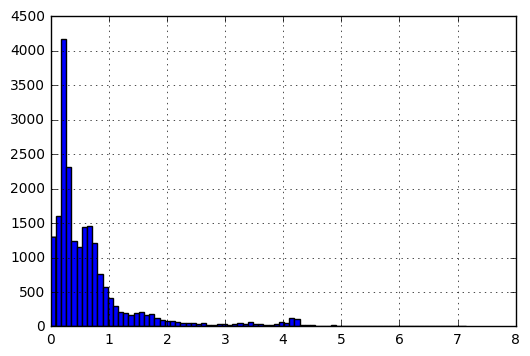

In [184]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# matplotlib.hist(liz['Ks'])

liz['Ks'].hist(bins=80)



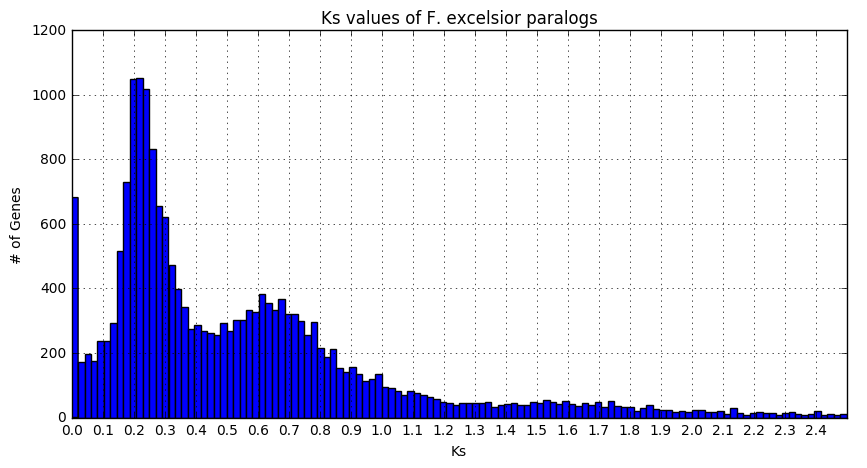

In [261]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.xticks(np.arange(0, 2.6, .1))
h = liz[liz['Ks'] < 2.5]['Ks'].hist(bins=120, figsize=(10,5))
h.set_xlabel('Ks')
h.set_ylabel('# of Genes')
h.set_title('Ks values of F. excelsior paralogs')

In [195]:
pp(len(liz[liz['Ks'] > 1.9]) / len(liz['Ks']))

'6.954230%'

In [111]:
len(liz[liz['Ks'] < 2])

19504

In [157]:
# Family exclusion process
survivors = set(functional_orthogroups.keys())
# remove families not present in Lizzy's set
all_lizzys_genes = set(liz_rows_into_gene_list(liz))
for family, row in functional_orthogroups.items():
    if not any([gene in all_lizzys_genes for gene in row['genes'] ]):
        survivors.remove(family) # remove any family with no excelsior genes
        
        
all_young = liz_rows_into_gene_list(liz[unaffected])  # liz[liz['Ks'] < 1.5]
for gene in all_young:
    if gene in gene2family:
        family = gene2family[gene]
        if family in survivors:
            survivors.remove(family)
pp(len(survivors) / len(functional_orthogroups))

'10.707673%'

In [158]:
lind = output_set_enrichment(survivors, functional_orthogroups, 'Liz Families that were affected by either WGD')

Received 2082 families with 2082 genes.
Building GO tree
Analyzing enrichment of 2082 genes.
Output D:\josiah\Documents\Research\Thesis - Genome Symmetry\DNA_Duplications\Liz Families that were affected by either WGD.html


In [148]:
len([family for family in functional_orthogroups.values() if len(family['genes']) == 1])

772

# Intersecting static copy number families with those affected by WGD
I have 
* List of families that are 2 copy and stable copy number
* List of excelsior genes with a particular Ks value  

I can make  
* subset of previous gene families that contain those selected excelsior genes

#### Read Ancestral CSV to sort families by copy number

In [242]:
copy_numbers = read_csv(r"CAFE-4.2\data\exemplars\reports\exemplar_reestimate_summary_anc.txt", sep='\t')
copy_numbers = copy_numbers[['Family ID',
 'FRAX00<2>',
 'FRAX06<4>',
 'FRAX07<0>',
 'FRAX19<6>',
 'FRAX11<8>',
 'FRAX09<10>',
 'Oeuropea<12>',
 'Mguttatus<16>',
 'Slycopersicum<14>',
 '<3>',
 '<15>',
 '<11>',
 '<1>',
 '<7>',
 '<9>',
 '<5>']]
print(pp(len(copy_numbers)))
copy_numbers.head()

27,737


,Family ID,FRAX00<2>,FRAX06<4>,FRAX07<0>,FRAX19<6>,FRAX11<8>,FRAX09<10>,Oeuropea<12>,Mguttatus<16>,Slycopersicum<14>,<3>,<15>,<11>,<1>,<7>,<9>,<5>
0,0,11,28,23,35,32,32,19,1,5,25,7,25,26,32,32,28
1,1,22,20,17,22,20,19,20,9,10,21,13,21,21,21,21,21
2,2,19,18,17,19,20,21,22,9,13,19,14,21,19,20,20,20
3,3,24,15,17,15,16,18,34,21,24,20,24,25,20,18,18,20
4,4,20,16,15,20,14,17,13,8,12,18,12,18,18,18,18,18


In [243]:
exemplar_fraxinus_columns = ('FRAX06<4>','FRAX00<2>','FRAX09<10>','FRAX11<8>','FRAX07<0>','FRAX19<6>', 'Oeuropea<12>')
families_in_all_species = copy_numbers['Family ID'] != None
for f in exemplar_fraxinus_columns:
    rows = copy_numbers[f] > 0 
    families_in_all_species = families_in_all_species & rows
families_in_all_species = copy_numbers[families_in_all_species]
families_in_all_species.tail(100)

,Family ID,FRAX00<2>,FRAX06<4>,FRAX07<0>,FRAX19<6>,FRAX11<8>,FRAX09<10>,Oeuropea<12>,Mguttatus<16>,Slycopersicum<14>,<3>,<15>,<11>,<1>,<7>,<9>,<5>
19591,19608,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19606,19623,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19607,19624,1,1,1,1,1,1,1,2,3,1,2,1,1,1,1,1
19608,19625,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
19609,19626,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1
19612,19629,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19620,19637,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1
19625,19642,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19634,19651,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19637,19654,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [244]:
pp(len(families_in_all_species))

'15,858'

In [254]:
exemplar_oleaceae_columns = families_in_all_species.loc[: ,'FRAX00<2>':'Oeuropea<12>']
families_in_all_species['Oleaceae Avg'] = exemplar_oleaceae_columns.mean(axis=1)
families_in_all_species['Oleaceae Std Dev'] = exemplar_oleaceae_columns.std(axis=1)
families_in_all_species['Coefficient of Variation'] = families_in_all_species['Oleaceae Std Dev'] / families_in_all_species['Oleaceae Avg']

d:\josiah\projects\jupyter\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
d:\josiah\projects\jupyter\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
d:\josiah\projects\jupyter\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [255]:
families_in_all_species.head()

,Family ID,FRAX00<2>,FRAX06<4>,FRAX07<0>,FRAX19<6>,FRAX11<8>,FRAX09<10>,Oeuropea<12>,Mguttatus<16>,Slycopersicum<14>,<3>,<15>,<11>,<1>,<7>,<9>,<5>,Oleaceae Avg,Oleaceae Std Dev,Coefficient of Variation
0,0,11,28,23,35,32,32,19,1,5,25,7,25,26,32,32,28,25.714286,8.557926,0.332808
1,1,22,20,17,22,20,19,20,9,10,21,13,21,21,21,21,21,20.000000,1.732051,0.086603
2,2,19,18,17,19,20,21,22,9,13,19,14,21,19,20,20,20,19.428571,1.718249,0.088439
3,3,24,15,17,15,16,18,34,21,24,20,24,25,20,18,18,20,19.857143,6.962485,0.350629
4,4,20,16,15,20,14,17,13,8,12,18,12,18,18,18,18,18,16.428571,2.760262,0.168016


In [245]:
double_copy = families_in_all_species['Family ID'] != None
for f in exemplar_fraxinus_columns:
    rows = families_in_all_species[f] == 2 
    double_copy = double_copy & rows
double_copy = families_in_all_species[double_copy]

print(pp(len(double_copy)))

double_copy.head()
# single_copy = 
# multi_copy_families = 

1,366


,Family ID,FRAX00<2>,FRAX06<4>,FRAX07<0>,FRAX19<6>,FRAX11<8>,FRAX09<10>,Oeuropea<12>,Mguttatus<16>,Slycopersicum<14>,<3>,<15>,<11>,<1>,<7>,<9>,<5>
2163,2163,2,2,2,2,2,2,2,1,1,2,1,2,2,2,2,2
2898,2898,2,2,2,2,2,2,2,1,16,2,4,2,2,2,2,2
3012,3012,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2
3023,3023,2,2,2,2,2,2,2,3,1,2,2,2,2,2,2,2
3051,3051,2,2,2,2,2,2,2,1,1,2,1,2,2,2,2,2


#### Testing whether single copy number families do not occur in the Ks excelsior gene list (they shouldn't)

------------------------------------------------

_____________________________________________

# Cross reference with CAFE divergent family results
This should allow us to translate "OG000495 contracted significantly" to "Most species lost galactose metabolism" etc.

In [ ]:
rapid_cafe_fam_ids = [int(a) for a in "0,2,3,4,5,6,7,8,10,12,15,16,17,18,19,20,22,23,25,27,28,29,30,31,32,33,34,35,38,39,41,43,44,47,48,49,50,52,53,54,56,57,59,60,61,64,65,66,67,69,70,72,73,74,75,76,77,79,80,82,84,85,86,90,91,93,95,97,99,101,102,103,110,111,112,113,114,115,117,118,119,121,122,123,124,126,130,135,138,139,141,142,146,148,150,151,152,153,154,155,160,163,166,169,171,174,176,177,178,181,182,183,184,185,187,189,190,191,193,194,195,197,198,200,202,204,207,208,209,213,216,219,220,223,230,232,235,241,245,246,247,258,260,263,265,266,271,274,277,280,281,283,284,285,289,290,291,292,295,297,306,307,309,312,318,319,326,329,331,332,335,341,342,347,350,351,352,353,358,359,362,363,372,375,376,377,383,384,385,386,393,394,397,407,416,418,419,421,423,424,430,431,436,438,440,442,445,456,464,469,474,486,493,500,504,516,517,519,527,539,540,544,546,549,553,556,558,567,569,570,571,574,579,583,586,587,588,590,591,592,597,605,606,611,619,623,625,629,630,635,639,645,646,652,653,655,662,664,676,679,683,685,689,694,703,706,707,709,725,734,746,752,763,765,768,782,784,785,797,807,812,817,827,831,835,836,837,840,841,848,851,853,855,859,862,864,873,874,885,902,906,907,911,917,929,931,932,934,935,938,942,943,948,949,955,957,959,962,964,979,982,1003,1014,1017,1018,1020,1021,1022,1032,1034,1044,1046,1049,1051,1052,1068,1069,1076,1082,1085,1086,1092,1095,1098,1099,1112,1113,1128,1133,1139,1147,1155,1156,1164,1167,1169,1172,1173,1176,1187,1190,1192,1209,1211,1218,1220,1228,1246,1248,1255,1259,1260,1261,1269,1280,1281,1290,1299,1316,1327,1335,1346,1347,1349,1354,1358,1363,1367,1369,1379,1382,1387,1390,1392,1395,1403,1413,1423,1432,1439,1441,1442,1444,1445,1448,1450,1452,1463,1465,1469,1472,1473,1474,1488,1489,1498,1515,1523,1542,1552,1594,1606,1611,1614,1628,1638,1640,1647,1651,1669,1677,1689,1693,1707,1708,1709,1710,1713,1715,1716,1717,1726,1740,1751,1772,1774,1792,1797,1799,1800,1817,1823,1826,1835,1837,1843,1845,1848,1849,1854,1862,1868,1873,1875,1884,1886,1891,1896,1916,1919,1920,1927,1937,1945,1946,1949,1950,1955,1957,1978,2007,2019,2020,2031,2037,2050,2051,2054,2075,2078,2100,2107,2117,2132,2140,2143,2146,2158,2159,2198,2220,2235,2237,2244,2250,2252,2269,2285,2286,2295,2298,2300,2307,2308,2318,2319,2322,2336,2341,2353,2367,2391,2416,2417,2433,2446,2452,2455,2468,2470,2474,2477,2478,2495,2500,2506,2512,2515,2521,2532,2534,2543,2560,2564,2569,2574,2575,2583,2592,2593,2595,2598,2602,2603,2604,2609,2613,2621,2628,2630,2631,2639,2644,2647,2649,2651,2671,2704,2713,2716,2720,2721,2725,2727,2732,2753,2762,2765,2777,2782,2791,2795,2797,2807,2808,2818,2822,2829,2841,2845,2849,2854,2865,2870,2873,2874,2877,2888,2904,2918,2921,2925,2929,2932,2937,2939,2957,2964,2980,2985,2986,2990,2993,3003,3004,3005,3006,3017,3020,3025,3027,3033,3044,3050,3056,3059,3060,3065,3082,3089,3092,3113,3138,3141,3144,3161,3164,3166,3169,3199,3208,3218,3253,3256,3262,3271,3272,3279,3282,3284,3289,3294,3301,3307,3354,3355,3358,3360,3362,3376,3377,3380,3381,3388,3389,3391,3435,3442,3446,3448,3450,3454,3455,3456,3460,3469,3478,3482,3485,3486,3489,3493,3494,3532,3539,3544,3548,3552,3557,3579,3586,3591,3595,3600,3603,3625,3644,3645,3647,3649,3652,3657,3664,3665,3687,3688,3696,3697,3713,3715,3716,3729,3731,3732,3753,3754,3755,3756,3783,3791,3826,3827,3831,3834,3835,3838,3841,3842,3844,3847,3880,3890,3892,3925,3931,3940,4006,4019,4023,4059,4072,4083,4104,4110,4113,4120,4175,4205,4213,4217,4223,4232,4237,4238,4241,4271,4290,4314,4323,4341,4350,4365,4379,4409,4450,4463,4465,4484,4492,4520,4527,4635,4643,4646,4694,4707,4733,4740,4758,4778,4789,4797,4811,4823,4832,4833,4835,4836,4837,4883,4909,4916,4940,4957,4967,5008,5015,5024,5038,5107,5149,5152,5159,5172,5189,5194,5197,5202,5267,5279,5290,5361,5378,5407,5419,5508,5543,5564,5573,5591,5599,5610,5622,5631,5632,5774,5825,5840,5862,5907,5943,5958,5971,5979,5984,6001,6004,6012,6038,6075,6097,6112,6166,6171,6182,6186,6202,6335,6359,6367,6396,6400,6411,6421,6469,6501,6554,6579,6582,6645,6688,6708,6717,6728,6741,6745,6757,6779,6826,6827,6828,6844,6851,6858,6910,6922,7007,7010,7027,7048,7068,7101,7104,7105,7112,7130,7132,7137,7166,7180,7190,7192,7197,7244,7247,7282,7286,7304,7307,7314,7376,7377,7392,7398,7433,7443,7495,7519,7523,7533,7580,7597,7610,7611,7640,7663,7668,7672,7678,7713,7777,7783,7797,7798,7815,7817,7836,7846,7851,7853,7876,7957,8000,8013,8020,8023,8045,8047,8078,8105,8122,8125,8137,8142,8145,8146,8150,8153,8154,8166,8171,8172,8199,8203,8205,8219,8234,8240,8259,8298,8354,8355,8423,8436,8438,8453,8465,8466,8468,8469,8470,8474,8483,8487,8490,8491,8499,8506,8508,8527,8533,8602,8639,8673,8698,8711,8721,8722,8798,8810,8830,8834,8847,8849,8850,8855,8858,8871,8873,8885,8890,8910,8971,8976,8985,8992,9003,9016,9032,9054,9077,9094,9100,9135,9136,9165,9168,9198,9201,9215,9228,9230,9236,9239,9253,9270,9271,9274,9296,9330,9332,9355,9356,9359,9368,9397,9398,9400,9402,9409,9412,9417,9422,9430,9441,9455,9456,9461,9477,9478,9480,9514,9547,9557,9560,9569,9578,9589,9602,9605,9613,9632,9649,9654,9669,9672,9702,9724,9736,9738,9739,9767,9772,9774,9793,9798,9805,9807,9812,9817,9823,9825,9827,9835,9846,9850,9852,9874,9882,9892,9900,9913,9916,9936,9943,9976,9983,9994,9999,10006,10007,10010,10020,10032,10034,10052,10057,10059,10098,10104,10121,10126,10144,10148,10154,10158,10174,10191,10197,10210,10214,10222,10226,10231,10233,10236,10238,10245,10246,10274,10280,10283,10293,10302,10322,10328,10329,10332,10336,10337,10342,10344,10345,10350,10352,10360,10367,10373,10374,10381,10391,10417,10422,10425,10426,10450,10459,10460,10465,10467,10506,10510,10526,10532,10534,10538,10544,10563,10571,10573,10581,10599,10600,10610,10617,10624,10657,10658,10662,10676,10685,10686,10696,10707,10722,10726,10739,10742,10752,10760,10763,10771,10775,10777,10786,10792,10810,10814,10841,10896,10906,10907,10920,10925,10935,10936,10939,10943,10945,10958,10963,10965,10973,10976,10978,10992,10994,10998,11009,11017,11020,11030,11031,11032,11034,11036,11044,11045,11060,11063,11069,11078,11079,11105,11116,11133,11135,11136,11155,11171,11178,11180,11184,11218,11226,11227,11230,11238,11257,11266,11273,11286,11290,11303,11314,11315,11316,11322,11324,11327,11332,11343,11351,11368,11389,11406,11424,11426,11443,11456,11478,11482,11483,11487,11498,11501,11503,11508,11510,11520,11543,11608,11611,11614,11622,11623,11624,11626,11659,11680,11684,11702,11703,11706,11712,11723,11751,11765,11766,11769,11788,11792,11798,11813,11814,11823,11840,11841,11842,11846,11848,11856,11858,11881,11891,11894,11903,11923,11935,11940,11954,11955,11959,11994,12014,12015,12017,12039,12043,12053,12063,12084,12091,12127,12138,12146,12154,12176,12177,12190,12196,12197,12201,12204,12207,12221,12246,12274,12276,12279,12318,12328,12335,12344,12379,12401,12467,12514,12515,12546,12556,12573,12578,12640,12718,12750,12794,12796,12803,12813,12977,13014,13061,13108,13112,13118,13205,13217,13263,13276,13283,13366,13372,13375,13423,13428,13451,13591,13627,13711,13729,13752,13786,13817,13886,13902,13930,13957,13991,14025,14030,14031,14032,14033,14035,14063,14111,14116,14124,14150,14183,14195,14263,14295,14356,14380,14452,14549,14553,14624,14685,14768,14801,14852,14900,14931,14939,14947,14948,14960,14996,15037,15093,15128,15146,15153,15317,15358,15364,15415,15433,15471,15554,15677,15790,15802,15810,15899,15914,15924,15935,15944,15965,16107,16117,16166,16185,16187,16192,16214,16268,16318,16381,16390,16411,16418,16427,16465,16493,16500,16503,16505,16507,16514,16517,16551,16564,16582,16609,16612,16793,16814,16828,16835,16849,16858,16890,16901,16904,16927,16966,17034,17047,17051,17058,17059,17065,17076,17079,17080,17081,17089,17097,17098,17160,17203,17205,17212,17235,17236,17286,17288,17297,17309,17329,17330,17339,17350,17366,17419,17420,17428,17429,17436,17454,17486,17488,17499,17501,17507,17516,17520,17521,17524,17540,17547,17553,17556,17568,17599,17626,17651,17685,17688,17705,17740,17741,17753,17780,17801,17820,17824,17828,17829,17836,17838,17843,17846,17849,17884,17897,17917,17929,17937,17942,17944,17950,17953,17971,17975,17988,17991,17997,17998,17999,18004,18005,18016,18020,18027,18028,18044,18051,18069,18094,18102,18114,18139,18145,18146,18147,18151,18152,18163,18180,18182,18197,18203,18238,18265,18266,18295,18327,18330,18334,18348,18354,18356,18358,18381,18387,18388,18416,18421,18424,18426,18433,18438,18452,18459,18484,18519,18553,18559,18573,18589,18591,18595,18624,18633,18636,18642,18652,18670,18675,18679,18686,18693,18696,18706,18708,18715,18719,18733,18737,18744,18747,18749,18763,18780,18799,18813,18823,18834,18841,18844,18868,18874,18878,18893,18901,18904,18910,18923,18948,18954,18992,18994,18996,19058,19060,19061,19066,19067,19079,19085,19087,19091,19122,19193,19209,19210,19224,19233,19234,19239,19242,19244,19249,19255,19256,19258,19259,19261,19263,19268,19277,19296,19297,19300,19318,19320,19358,19360,19362,19369,19373,19377,19378,19383,19385,19392,19410,19418,19421,19422,19451,19482,19484,19492,19525,19528,19538,19553,19558,19577,19579,19580,19583,19585,19587,19599,19600,19609,19610,19615,19644,19649,19659,19666,19667,19668,19675,19677,19685,19687,19691,19693,19705,19711,19718,19724,19734,19740,19745,19746,19747,19755,19757,19759,19774,19777,19794,19806,19833,19840,19843,19862,19867,19883,19901,19910,19916,19926,19929,19930,19931,19954,19980,19981,19982,19985,19986,19996,20038,20052,20053,20056,20064,20069,20070,20111,20121,20122,20127,20128,20138,20144,20171,20173,20179,20185,20204,20206,20211,20221,20222,20227,20241,20268,20270,20278,20281,20293,20307,20313,20341,20352,20381,20400,20408,20415,20419,20424,20445,20454,20472,20477,20488,20508,20525,20533,20534,20540,20542,20549,20561,20572,20579,20580,20585,20598,20611,20613,20616,20639,20654,20659,20667,20673,20686,20687,20691,20693,20697,20698,20705,20715,20717,20740,20755,20766,20769,20777,20789,20829,20833,20839,20863,20878,20880,20881,20886,20890,20893,20897,20903,20919,20922,20923,20924,20946,20949,20967,20984,21011,21031,21047,21062,21068,21082,21086,21104,21107,21120,21138,21145,21146,21165,21169,21176,21179,21181,21199,21202,21289,21295,21304,21329,21332,21338,21368,21373,21381,21382,21385,21389,21425,21431,21437,21439,21440,21442,21453,21479,21538,21546,21557,21568,21585,21593,21613,21624,21629,21632,21633,21656,21676,21715,21723,21741,21836,21859,21877,21894,21942,21947,21955,21975,21986,21990,22005,22012,22090,22106,22199,22213,22216,22279,22282,22320,22339,22342,22349,22353,22386,22390,22432,22511,22543,22569,22591,22656,22668,22797,22823,22843,22849,22878,22888,22926,22982,23002,23006,23055,23057,23076,23367,23422,23522,23527,23625,23692,23729,23754,23769,23780,24160,24571,24651,24740,24791,24797,24819,24827,24829,24835,24837,24870,25274,26446".split(',')]
len(rapid_cafe_fam_ids), rapid_cafe_fam_ids[118]

Skip first 50 families, these are sorted by family size and the biggest ones are always deviant

In [ ]:
for cafe_id in rapid_cafe_fam_ids:
    name = cafe_to_OG(cafe_id)
    g = orthogroups[name]
    if len(g['genes']) < 70 and g['functions']:
        print(name, g['functions'])

# What is the Probability of Overlap in Rapid Families from exemplar_reestimate

In [ ]:
exemplar_family_ids = [int(a) for a in   "0,6,7,8,10,12,16,18,19,20,22,23,25,27,29,30,31,32,34,38,39,41,43,44,47,48,49,52,53,56,57,59,60,64,65,66,67,69,70,72,73,76,77,80,85,86,91,99,101,102,113,115,117,118,121,122,123,130,135,141,146,148,151,152,153,163,169,176,178,181,185,187,189,190,191,199,204,209,213,219,220,232,235,245,246,247,260,271,274,280,281,283,285,291,292,309,318,319,329,352,358,359,372,383,393,394,415,421,423,424,430,445,456,464,493,517,540,553,571,588,605,611,619,629,630,639,645,703,707,746,752,782,797,817,827,837,841,855,862,885,907,911,917,931,932,942,1014,1017,1051,1068,1069,1082,1085,1086,1112,1176,1218,1220,1246,1281,1316,1327,1368,1392,1403,1413,1423,1439,1445,1450,1472,1488,1489,1523,1606,1632,1638,1677,1689,1707,1708,1715,1792,1800,1826,1845,1848,1854,1868,1919,1937,1938,1957,2020,2031,2054,2100,2107,2237,2252,2269,2336,2391,2446,2468,2495,2521,2532,2581,2604,2609,2647,2649,2704,2720,2797,2818,2865,2874,2904,2990,3027,3033,3044,3065,3092,3212,3218,3271,3284,3289,3354,3376,3411,3446,3455,3456,3482,3485,3688,3696,3715,3731,3827,3834,3842,3847,3890,3940,4006,4019,4024,4083,4110,4113,4223,4241,4323,4341,4450,4492,4527,4789,4832,4835,4837,4957,5172,5189,5197,5573,5774,5825,5999,6097,6166,6396,6400,6421,6596,6828,6835,6844,7112,7180,7284,7357,7640,7668,7678,7713,7798,7817,7836,7846,8004,8145,8150,8153,8154,8171,8172,8309,8354,8423,8466,8483,8487,8520,8554,8698,8722,8855,8910,8951,8985,8992,9107,9228,9359,9397,9422,9441,9632,9677,9708,9738,9791,9812,9822,9825,10009,10010,10059,10246,10274,10280,10350,10537,10573,10742,10777,10806,10828,11032,11069,11260,11406,11618,11624,11703,11788,11959,12146,12147,12507,12514,12515,12546,12813,13112,13113,14031,14034,14035,14624,15153,15204,16505,16507,16514,16515,17079,17335,17499,17508,17509,17603,17741,17793,17843,17937,17950,18144,18163,18165,18182,18259,18295,18424,18433,18474,18675,18748,18923,18933,19057,19063,19083,19132,19256,19259,19263,19274,19275,19373,19428,19495,19520,19578,19584,19604,19605,19610,19755,19758,19770,19778,19893,19920,19931,19995,20056,20065,20070,20072,20074,20079,20103,20217,20221,20222,20229,20249,20380,20397,20402,20405,20416,20445,20549,20560,20569,20573,20575,20579,20580,20585,20727,20729,20738,20760,20766,20767,20768,20769,20792,20878,20912,20916,20926,20930,20934,20938,20939,20942,20944,20953,20970,20982,20985,20994,20996,21005,21015,21016,21067,21083,21144,21145,21146,21148,21152,21161,21164,21168,21169,21170,21181,21186,21191,21193,21202,21209,21210,21212,21221,21238,21374,21375,21377,21378,21383,21388,21390,21392,21396,21398,21399,21400,21403,21405,21410,21412,21414,21419,21420,21421,21423,21429,21431,21432,21437,21439,21440,21441,21443,21444,21451,21452,21454,21468,21478,21479,21510,21511,21513,21543,21554,21622,21628,21632,21635,21636,21640,21642,21645,21656,21657,21658,21659,21663,21665,21670,21673,21675,21678,21679,21681,21685,21687,21688,21690,21695,21696,21699,21705,21706,21709,21715,21716,21740,21741,21743,21744,21754,21765,21774,21795,21796,21797,21798,21800,21802,21806,21807,21951,21954,21955,21957,21959,21960,21961,21962,21963,21964,21968,21973,21974,21975,21976,21981,21987,21990,21991,21997,21999,22003,22005,22006,22008,22012,22015,22017,22018,22022,22023,22024,22025,22028,22037,22038,22039,22044,22051,22056,22057,22058,22061,22064,22066,22072,22074,22079,22080,22082,22094,22100,22101,22104,22106,22109,22112,22116,22121,22124,22125,22129,22131,22135,22139,22146,22151,22153,22154,22164,22189,22191,22193,22194,22195,22197,22198,22206,22207,22208,22213,22214,22219,22349,22350,22353,22354,22362,22363,22364,22365,22371,22375,22383,22385,22386,22391,22397,22399,22400,22401,22402,22405,22406,22407,22408,22412,22413,22414,22415,22416,22417,22419,22420,22421,22423,22424,22428,22430,22437,22439,22441,22442,22444,22445,22446,22447,22448,22450,22453,22454,22455,22458,22460,22462,22463,22464,22465,22466,22472,22474,22475,22476,22480,22484,22486,22487,22488,22490,22498,22499,22505,22506,22510,22511,22515,22519,22522,22523,22530,22531,22534,22535,22543,22550,22553,22562,22565,22566,22577,22580,22582,22584,22589,22590,22591,22593,22594,22601,22626,22627,22628,22629,22630,22632,22633,22634,22635,22636,22647,22649,22652,22653,22656,22660,22664,22665,22666,22829,22830,22831,22833,22834,22835,22836,22839,22840,22841,22842,22843,22844,22845,22849,22850,22853,22858,22860,22862,22863,22865,22866,22868,22869,22872,22874,22875,22876,22877,22878,22880,22881,22883,22884,22887,22889,22890,22893,22895,22902,22903,22905,22907,22908,22909,22914,22917,22918,22919,22920,22921,22922,22924,22925,22928,22929,22930,22933,22934,22936,22939,22942,22943,22945,22946,22947,22948,22949,22950,22952,22954,22956,22958,22960,22963,22964,22966,22967,22969,22972,22973,22975,22976,22978,22979,22981,22986,22987,22992,22996,22997,23000,23001,23007,23008,23011,23014,23018,23021,23025,23032,23038,23039,23040,23041,23042,23044,23052,23055,23056,23057,23059,23062,23063,23064,23068,23069,23071,23072,23073,23074,23076,23080,23081,23082,23084,23086,23089,23098,23104,23106,23110,23116,23117,23118,23120,23122,23127,23129,23131,23132,23135,23141,23142,23144,23145,23147,23153,23205,23207,23208,23210,23211,23212,23213,23214,23219,23221,23223,23224,23225,23226,23227,23228,23229,23230,23232,23233,23234,23249,23250,23252,23253,23254,23255,23256,23257,23258,23260,23261,23262,23271,23274,23275,23276,23289,23290,23296,23297,23518,23519,23521,23522,23524,23525,23529,23530,23532,23533,23535,23537,23538,23541,23542,23545,23546,23547,23550,23551,23552,23553,23555,23556,23557,23558,23560,23563,23564,23565,23566,23567,23569,23570,23571,23573,23575,23576,23581,23582,23587,23593,23595,23598,23599,23601,23602,23603,23608,23610,23612,23616,23617,23618,23620,23622,23624,23627,23630,23632,23640,23641,23642,23644,23648,23649,23650,23651,23654,23655,23656,23657,23658,23660,23662,23663,23665,23666,23667,23669,23670,23671,23672,23673,23674,23676,23677,23678,23680,23681,23682,23683,23687,23688,23689,23693,23695,23696,23697,23699,23702,23704,23705,23711,23712,23713,23716,23717,23718,23719,23720,23721,23722,23723,23724,23726,23728,23729,23730,23731,23736,23739,23749,23751,23752,23754,23758,23760,23764,23765,23769,23775,23777,23778,23779,23781,23782,23783,23785,23787,23788,23789,23790,23791,23796,23798,23799,23801,23807,23809,23811,23812,23814,23816,23819,23821,23822,23823,23824,23826,23829,23831,23835,23836,23837,23845,23846,23854,23865,23869,23870,23873,23876,23884,23885,23888,23897,23900,23902,23904,23905,23906,23907,23909,23915,23921,23925,23926,23927,23929,23931,23933,23935,23940,23944,24018,24021,24022,24023,24025,24026,24027,24028,24029,24030,24031,24033,24035,24036,24038,24039,24040,24041,24044,24048,24050,24051,24052,24054,24055,24056,24057,24058,24059,24060,24061,24062,24063,24064,24107,24108,24109,24110,24111,24112,24113,24114,24115,24116,24117,24118,24119,24122,24123,24125,24126,24127,24131,24133,24136,24138,24140,24142,24143,24144,24145,24146,24147,24149,24150,24151,24152,24154,24155,24159,24160,24161,24163,24167,24168,24170,24173,24175,24177,24187,24192,24194,24195,24196,24197,24198,24200,24201,24202,24203,24204,24207,24208,24210,24211,24212,24214,24215,24479,24481,24483,24485,24486,24487,24488,24489,24490,24491,24493,24495,24496,24499,24500,24501,24502,24506,24507,24508,24511,24512,24513,24514,24516,24518,24519,24521,24522,24523,24527,24528,24529,24530,24532,24535,24536,24537,24538,24539,24540,24541,24542,24543,24544,24545,24548,24549,24550,24551,24553,24554,24555,24557,24558,24560,24561,24563,24564,24565,24566,24567,24568,24570,24571,24575,24577,24578,24580,24583,24584,24587,24590,24592,24593,24595,24597,24601,24606,24607,24608,24610,24611,24612,24613,24614,24615,24616,24618,24619,24620,24621,24622,24623,24624,24625,24627,24628,24631,24632,24634,24635,24636,24639,24640,24643,24644,24645,24648,24649,24650,24654,24656,24657,24659,24661,24662,24663,24664,24666,24670,24671,24673,24674,24676,24677,24679,24680,24681,24682,24683,24684,24687,24688,24690,24692,24693,24694,24696,24698,24699,24700,24701,24703,24704,24706,24709,24710,24711,24715,24717,24721,24724,24726,24727,24731,24734,24735,24736,24737,24738,24740,24741,24742,24743,24745,24746,24747,24748,24749,24750,24751,24752,24755,24756,24757,24759,24761,24763,24765,24767,24768,24769,24773,24774,24776,24778,24780,24781,24782,24783,24784,24785,24786,24787,24788,24790,24791,24792,24793,24794,24795,24796,24797,24798,24799,24800,24802,24803,24804,24805,24806,24809,24810,24811,24812,24813,24816,24817,24819,24820,24821,24822,24824,24826,24827,24828,24831,24832,24834,24835,24836,24837,24839,24841,24843,24844,24845,24846,24848,24851,24852,24853,24854,24855,24856,24857,24858,24859,24861,24862,24863,24864,24865,24866,24867,24870,24872,24873,24874,24875,24876,24878,24879,24883,24884,24890,24905,24909,24915,24916,24917,24921,24934,24940,24952,24955,24962,24967,24971,24977,24981,24991,24994,24999,25001,25003,25004,25005,25007,25008,25009,25010,25011,25013,25014,25015,25016,25017,25018,25021,25022,25024,25026,25027,25028,25031,25032,25033,25036,25037,25038,25040,25042,25043,25044,25045,25046,25047,25049,25051,25052,25053,25054,25058,25059,25060,25062,25063,25064,25065,25068,25069,25070,25072,25073,25074,25077,25080,25082,25083,25084,25085,25186,25189,25190,25193,25194,25195,25196,25197,25198,25199,25200,25201,25202,25203,25204,25205,25207,25208,25209,25210,25211,25213,25214,25215,25216,25217,25218,25219,25220,25221,25225,25226,25227,25228,25230,25231,25233,25234,25235,25236,25237,25238,25239,25240,25320,25322,25323,25324,25325,25326,25327,25328,25329,25330,25331,25332,25333,25334,25335,25336,25338,25339,25340,25341,25342,25343,25344,25346,25347,25348,25350,25351,25352,25353,25354,25355,25357,25358,25360,25361,25362,25363,25364,25365,25366,25367,25368,25369,25370,25371,25372,25373,25374,25375,25377,25378,25379,25380,25381,25382,25383,25385,25386,25387,25388,25389,25390,25391,25392,25394,25395,25397,25398,25399,25400,25401,25402,25403,25404,25405,25406,25407,25408,25409,25410,25411,25412,25413,25416,25417,25418,25419,25420,25421,25422,25423,25424,25425,25426,25427,25430,25431,25432,25433,25434,25438,25439,25440,25441,25442,25443,25444,25445,25447,25448,25449,25450,25451,25452,25453,25454,25455,25457,25458,25461,25462,25463,25465,25466,25467,25468,25469,25471,25472,25473,25474,25475,25476,25480,25481,25482,25484,25488,25528,25529,25530,25531,25533,25535,25536,25537,25538,25539,25541,25542,25543,25544,25545,25546,25547,25549,25551,25553,25556,25559,25560,25561,25562,25564,25565,25567,25569,25570,25572,25575,25576,25578,25579,25581,25582,25583,25584,25585,25586,25587,25588,25589,25591,25592,25593,25594,25595,25596,25597,25598,25599,25601,25602,25603,25606,25607,25608,25609,25611,25612,25613,25615,25616,25617,25623,25625,26063,26064,26065,26066,26067,26068,26069,26070,26072,26073,26074,26075,26076,26078,26080,26081,26083,26084,26085,26086,26087,26088,26091,26092,26093,26094,26095,26096,26097,26098,26099,26101,26102,26103,26104,26106,26107,26108,26111,26112,26114,26115,26116,26117,26118,26119,26120,26121,26122,26123,26124,26125,26126,26127,26128,26129,26131,26132,26133,26134,26135,26136,26137,26139,26140,26142,26143,26144,26145,26146,26147,26148,26150,26151,26152,26153,26155,26156,26157,26158,26159,26160,26161,26162,26163,26165,26166,26167,26168,26169,26170,26171,26172,26173,26175,26177,26178,26180,26181,26182,26184,26185,26186,26187,26189,26190,26191,26192,26193,26194,26195,26196,26197,26198,26199,26200,26201,26202,26203,26204,26205,26206,26418,26419,26420,26421,26424,26425,26426,26427,26428,26429,26430,26431,26432,26434,26435,26436,26439,26441,26443,26444,26445,26446,26449,26451,26453,26457,26458,26460,26463,26464,26465,26466,26467,26469,26470,26471,26475,26476,26477,26479,26481,26482,26485,26486,26487,26489,26492,26494,26495,26496,26497,26500,26501,26503,26504,26505,26507,26508,26509,26511,26512,26513,26514,26516,26517,26519,26520,26521,26522,26523,26524,26528,26530,26532,26533,26534,26535,26536,26537,26538,26540,26543,26544,26545,26546,26547,26549,26552,26554,26556,26557,26559,26560,26561,26563,26564,26565,26569,26573,26574,26575,26576,26578,26579,26580,26581,26584,26585,26586,26587,26588,26589,26590,26591,26592,26593,26596,26598,26600,26601,26603,26604,26605,26607,26608,26609,26610,26611,26612,26613,26615,26618,26620,26622,26623,26625,26626,26627,26628,26629,26630,26631,26632,26633,26634,26635,26636,26638,26639,26640,26641,26642,26643,26645,26646,26647,26648,26649,26651,26652,26654,26656,26657,26658,26660,26663,26664,26667,26668,26669,26670,26671,26672,26675,26677,26678,26680,26682,26683,26684,26685,26686,26687,26688,26689,26690,26692,26693,26694,26696,26698,26700,26701,26702,26703,26705,26706,26707,26709,26710,26713,26714,26715,26716,26717,26718,26719,26721,26722,26723,26730,26731,26732,26735,26737,26738,26740,26741,26743,26744,26749,26751,26752,26753,26754,26757,26759,26763,26766,26767,26769,26771,26772,26775,26777,26779,26780,26781,26782,26984,26985,26986,26988,26989,26991,26992,26993,26994,26995,26996,26997,26998,26999,27000,27001,27002,27004,27006,27009,27010,27013,27014,27015,27017,27018,27019,27020,27021,27022,27023,27025,27026,27028,27029,27030,27031,27032,27033,27034,27035,27036,27037,27038,27039,27041,27042,27043,27044,27045,27046,27047,27048,27049,27050,27051,27054,27055,27056,27057,27058,27059,27060,27061,27062,27064,27065,27066,27068,27069,27228,27229,27230,27231,27232,27233,27234,27236,27237,27238,27239,27240,27241,27242,27243,27244,27245,27246,27248,27249,27250,27251,27253,27254,27256,27257,27258,27259,27260,27261,27262,27263,27264,27265,27266,27267,27268,27269,27270,27271,27272,27273,27274,27275,27276,27277,27278,27279,27280,27281,27282,27283,27284,27286,27287,27288,27289,27290,27291,27292,27294,27296,27297,27298,27299,27300,27301,27302,27304,27305,27306,27307,27308,27309,27310,27311,27312,27313,27314,27315,27316,27317,27318,27319,27321,27322,27323,27324,27325,27327,27329,27330,27331,27332,27333,27335,27336,27337,27338,27341,27343,27344,27345,27346,27347,27348,27352,27355,27356,27358,27360,27363,27364,27365,27366,27368,27370,27371,27373,27374,27375,27376,27378,27379,27380,27381,27382,27383,27384,27387,27388,27389,27390,27391,27392,27393,27395,27396,27398,27399,27400,27401,27402,27404,27406,27407,27408,27409,27410,27412,27413,27414,27415,27417,27419,27422,27423,27424,27425,27426,27427,27428,27429,27430,27431,27432,27433,27434,27435,27436,27437,27440,27441,27442,27444,27445,27447,27448,27449,27450,27451,27452,27453,27454,27455,27456,27457,27458,27459,27460,27461,27463,27464,27465,27466,27467,27468,27470,27471,27472,27473,27474,27475,27477,27478,27479,27480,27481,27482,27483,27484,27485,27486,27487,27488,27489,27490,27491,27492,27493,27494,27495,27496,27499,27500,27501,27502,27503,27504,27505,27506,27507,27508,27509,27510,27511,27512,27513,27514,27516,27517,27518,27519,27520,27521,27522,27523,27525,27526,27529,27531,27532,27536,27537,27538,27539,27541,27542,27543,27544,27545,27546,27548,27549,27550,27551,27552,27553,27554,27555,27556,27558,27561,27562,27563,27564,27705,27706,27708,27709,27710,27711,27713,27714,27715,27716,27717,27718,27719,27720,27722,27724,27725,27726,27728,27729,27730,27732,27733,27734,27737,27739,27744,27745,27746,27747,27750,27752,27753,27754,27755,27756,27757,27761,27763,27764,27765,27768,27771,27772,27773,27776,27777,27780,27781,27782,27783,27786,27789,27791,27792,27794,27795,27797,27798,27799,27800,27802,27806,27807,27810,27813,27815,27817,27819,27821,27822,27825,27827,27828,27831,27832,27833,27834,27835,27836,27837,27838,27839,27842,27844,27848,27849,27852,27853,27854,27855,27856,27857,27858,27859,27860,27861,27862,27863,27864,27865,27866,27867,27868,27870,27871,27872,27873,27874,27875,27876,27877,27878,27881,27883,27884,27886,27887,27888,27889,27890,27891,27893,27895,27896,27897,27898,27899,27900,27901,27903,27906,27907,27908,27909,27910,27912,27913,27914,27915,27917,27918,27920,27921,27922,27924,27925,27926,27927,27929,27931,27932,27934,27935,27936,27937,27938,27939,27940,27942,27943,27944,27945,27946,27947,27948,27949,27950,27951,27952,27953,27954,27955,27956,27957,27958,27960,27961,27962,27963,27964,27965,27966,27967,27968,27969,27970,27971,27972,27973,27974,27975,27976,27977,27978,27979,27980,27982,27983,27984,27985,27987,27988,27989,27991,27992,27993,27994,27995,27996,27997,27999,28000,28002,28003,28004,28005,28006,28007,28008,28009,28010,28011,28012,28013,28016,28018,28019,28021,28027,28030".split(',')]
len(exemplar_family_ids)

In [ ]:
both = set(rapid_cafe_fam_ids).intersection(set(exemplar_family_ids))
len(both)

417 families show as rapidly evolving in both studies.  Is this more than would be expected by chance for 28,330 families choose 2799?

In [ ]:
perc_coverage = len(exemplar_family_ids) / 28330
sample_size = len(rapid_cafe_fam_ids) 
int(perc_coverage * sample_size) #expected

Is 417 vs 198 a significant difference?  Turn it into an e-value.  Of course that assumes even distribution, which is certainly not true.

In [ ]:
from scipy.stats import hypergeom

In [ ]:
#pval = hypergeom.sf(k-1, M, n, N)
hypergeom.sf(417-1, 28330, len(rapid_cafe_fam_ids), len(exemplar_family_ids))  # pval assuming even distribution

In [ ]:
hypergeom.sf(7-1, 100, 20, 10)

In [ ]:
exemplar_orthogroup_sizes = {}
with open(r"CAFE-4.2\data\exemplars\exemplar_clade_filter.txt", newline='' ) as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    next(reader, None)  # skip the headers
    for nLines, row in enumerate(reader):
        counts = [int(c) for c in row[2:]]
        exemplar_orthogroup_sizes[row[0]] = sum(counts)

In [ ]:
all_gene_ids = [int(fam_str[2:]) for fam_str in exemplar_orthogroup_sizes.keys()]
len(all_gene_ids), all_gene_ids[:10]

In [ ]:
def filter_by_family_size(A, max_family_size):
    filtered = set()
    for cafe_id in A:
        name = cafe_to_OG(cafe_id)
        g = orthogroups[name]
        if len(g['genes']) < max_family_size:
            filtered.add(cafe_id)
    return filtered

def gene_overlap_prob(A, B, max_family_size):
    n_families = len(filter_by_family_size(all_gene_ids, max_family_size))
    A = filter_by_family_size(A, max_family_size)
    B = filter_by_family_size(B, max_family_size)
    intersect = len(set(A).intersection(set(B)))
    return hypergeom.sf(intersect-1, n_families, len(A), len(B))  # pval assuming even distribution

In [ ]:
gene_overlap_prob(rapid_cafe_fam_ids, exemplar_family_ids, 300)

In [ ]:
def overlap(A,B, max_family_size):
    A = filter_by_family_size(A, max_family_size)
    B = filter_by_family_size(B, max_family_size)
    return len(set(A).intersection(set(B)))
overlap_line = [overlap(rapid_cafe_fam_ids, exemplar_family_ids, i) for i in range(2, 300)]

In [ ]:
prob_line = [gene_overlap_prob(rapid_cafe_fam_ids, exemplar_family_ids, i) for i in range(2, 300)]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [ ]:
fig = plt.figure()
plt.semilogy(list(range(len(prob_line))), prob_line)
plt.ylabel("Overlap P-Value")
plt.xlabel("Maximum Family Size")

In [ ]:
fig2 = plt.figure()
plt.plot(list(range(len(overlap_line))), overlap_line)

In [ ]:
fig = plt.figure()
plt.semilogy(list(range(len(prob_line))), prob_line)

In [ ]:
fig2 = plt.figure()
plt.plot(list(range(len(overlap_line))), overlap_line)